# PLOTS

**Shapefiles**

In [195]:
# Imports
library(sf)
library(ggplot2)
library(rnaturalearth)

# Set bw theme for all plots
theme_set(theme_bw())

# World map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Read in shapefiles
chagos.simp = st_read("../Data/BIOT_DGBP/Chagos_v6_land_simple.shp")
chagos.land = st_read("../Data/BIOT_DGBP/Chagos_v6_land.shp")
chagos.back = st_read("../Data/BIOT_DGBP/Chagos_v6.shp")
eez = st_read("../Data/BIOT_DGBP/eez_noholes.shp")

Reading layer `Chagos_v6_land_simple' from data source 
  `/Users/alexzamar/Desktop/CMEE/PROJECT/Data/BIOT_DGBP/Chagos_v6_land_simple.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 62 features and 20 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 71.23838 ymin: -7.444724 xmax: 72.49538 ymax: -5.235481
Geodetic CRS:  WGS 84
Reading layer `Chagos_v6_land' from data source 
  `/Users/alexzamar/Desktop/CMEE/PROJECT/Data/BIOT_DGBP/Chagos_v6_land.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 62 features and 20 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 71.23833 ymin: -7.444724 xmax: 72.49538 ymax: -5.235481
Geodetic CRS:  WGS 84
Reading layer `Chagos_v6' from data source 
  `/Users/alexzamar/Desktop/CMEE/PROJECT/Data/BIOT_DGBP/Chagos_v6.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2001 features and 20 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 70.7791

# All GPS tracks

**Imports**

In [247]:
library(data.table)
library(ggplot2)
library(ggspatial)
library(stringr) ##
library(ggrepel)

options(repr.plot.width=15, repr.plot.height=15)  # Resize plot

**Plot**

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



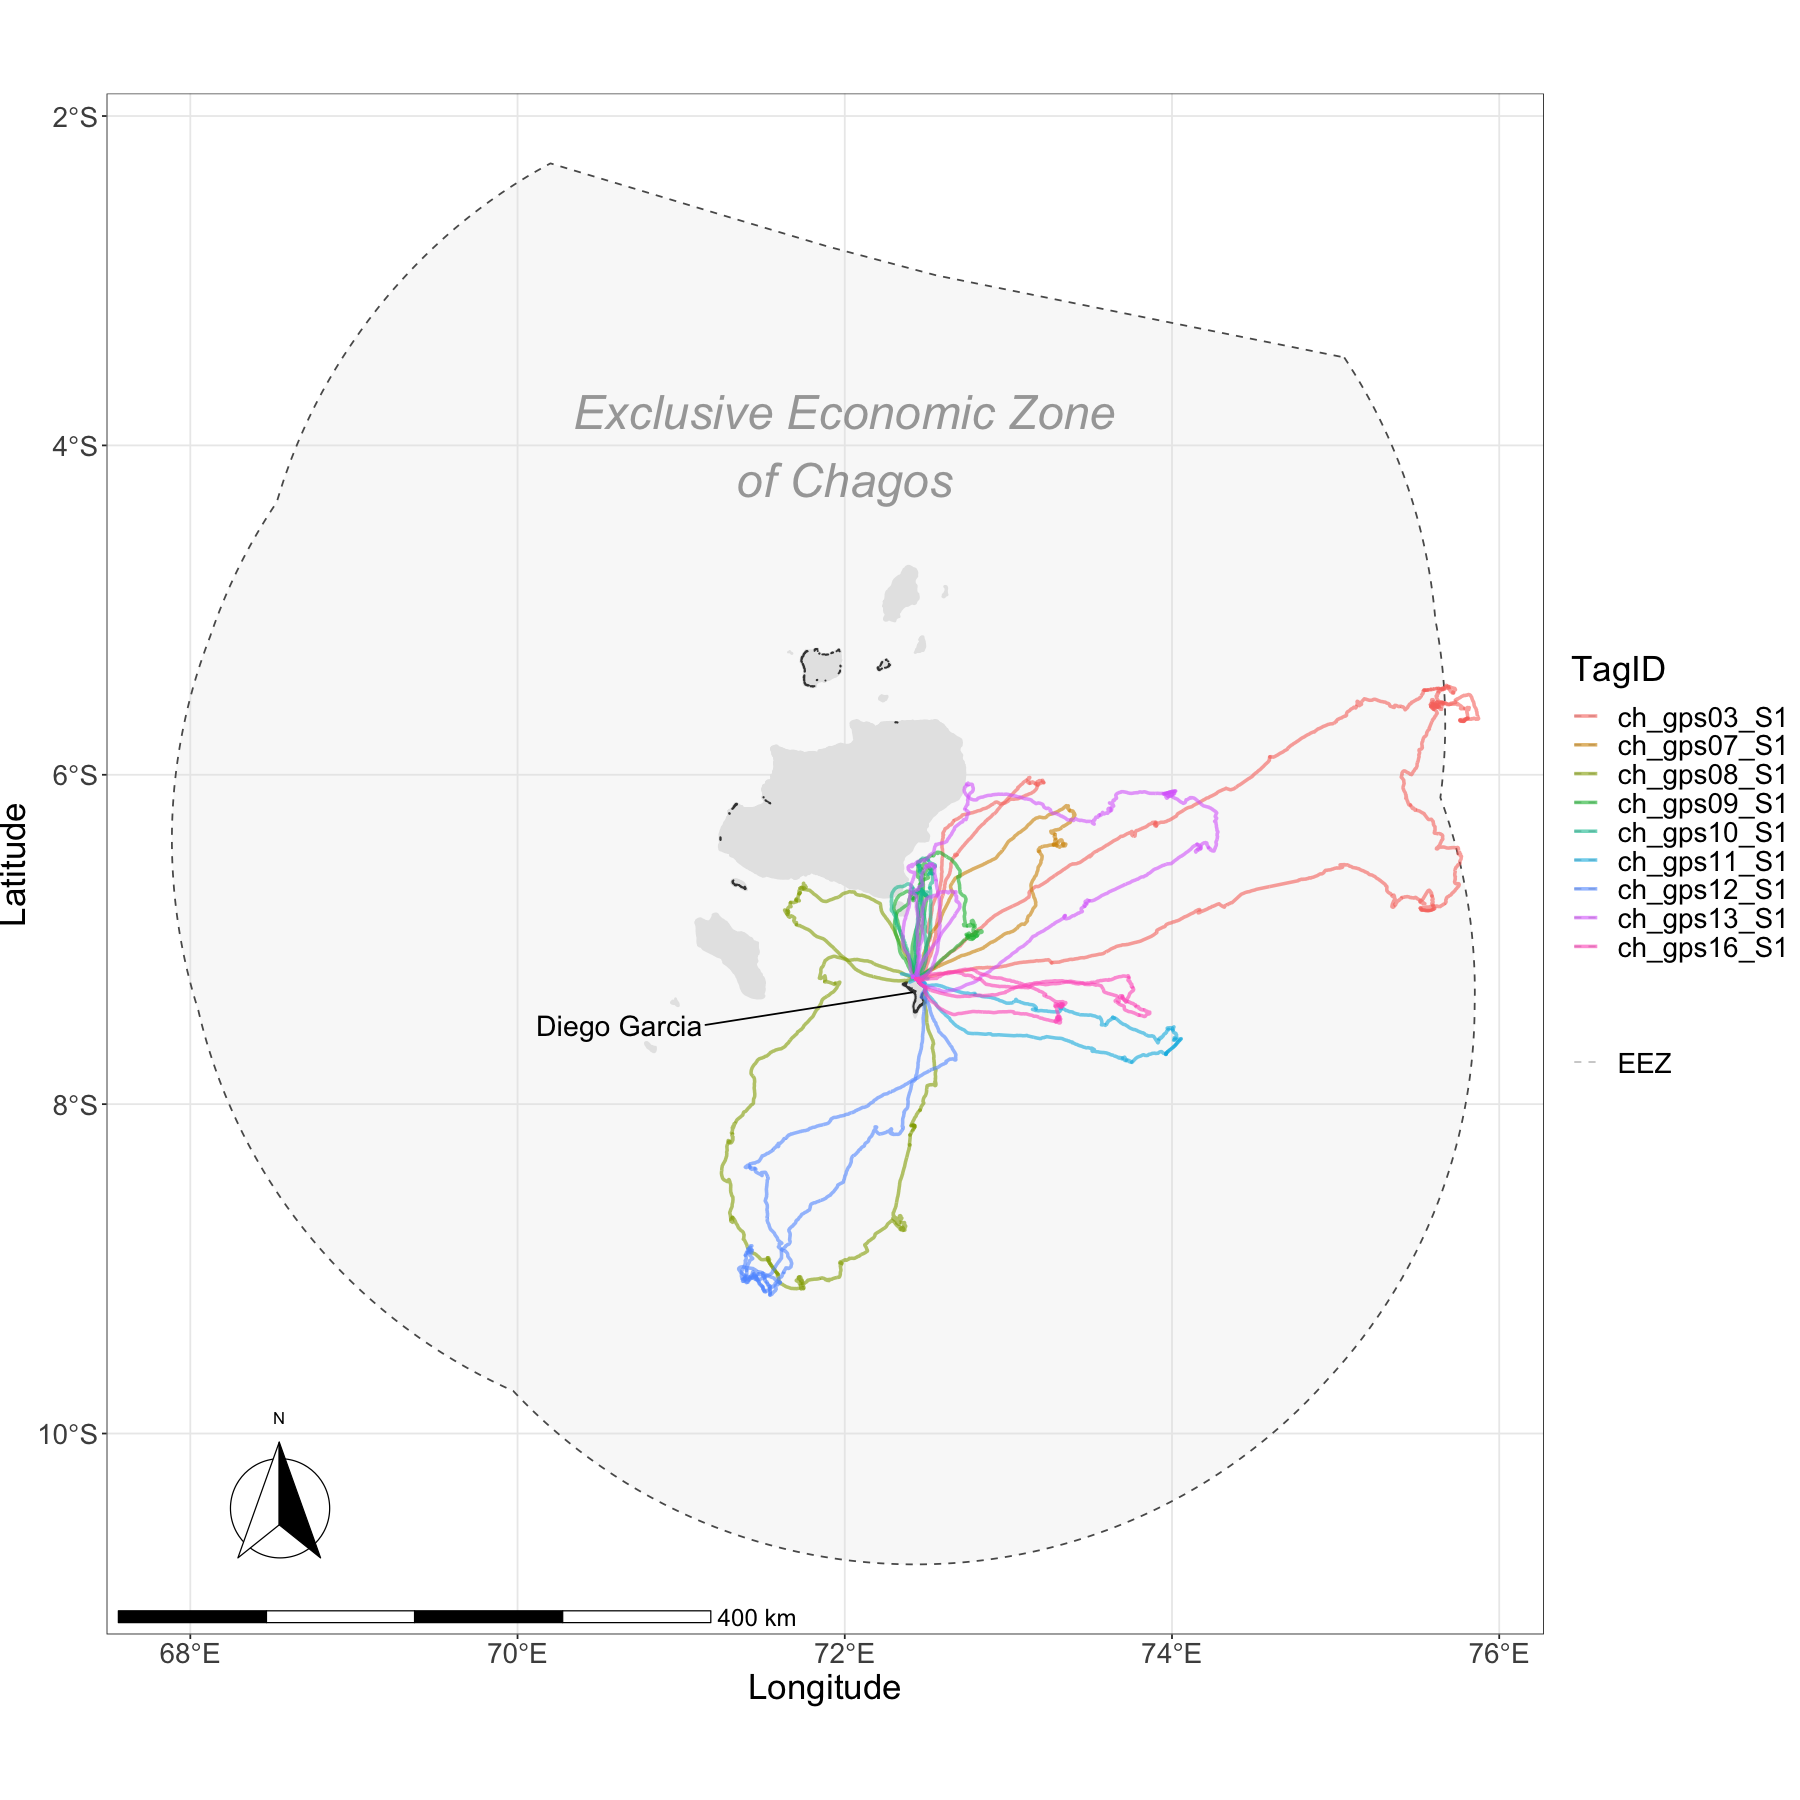

In [270]:
# Data import
gps_data_df = fread("../Data/BIOT_DGBP/all_gps_data.csv")
gps_data_df$TagID = str_remove(gps_data_df$TagID, "_gv[0-9]+_?[0-9]+") ## this can be removed also
birds = unique(gps_data_df$TagID)

# Plot
g <- ggplot(data = world) + 
      geom_sf(data = eez, alpha=0.25, linetype = "dashed", show.legend = "line") +  # MPA
      geom_sf(data = chagos.back, fill = 'gray90', colour = 'gray90') + 
      geom_sf(data = chagos.simp, colour='gray25', fill = 'gray25', size=0.5) +
      annotation_scale(location = "bl", width_hint = 0.5, text_cex = 1.2) + # scale bar
      #geom_point()+
      xlab("Longitude") + ylab("Latitude") + 
      #ggtitle("") +
      geom_path(data = gps_data_df, aes(x = `location-lon`, y = `location-lat`, colour=TagID), alpha=.6, size=1) +
      scale_fill_manual(values=rainbow(length(birds))) +
      annotate(geom = "text", x = 72, y = -4, label = "Exclusive Economic Zone\nof Chagos", 
               fontface = "italic", color = "grey27", size = 10, alpha=.5) + 
      theme(text = element_text(size = 21), plot.margin = rep(unit(0,"null"),4)) +
      annotation_north_arrow(location = "bl", which_north = "true", 
                             height = unit(3.5, "cm"),
                             width = unit(3.5, "cm"),
                             pad_x = unit(0.75, "in"), 
                             pad_y = unit(0.5, "in"),
                             style = north_arrow_fancy_orienteering) +
      geom_text_repel(data = data.frame(lng = c(-7.3195), lat = c(72.4229), label = c("Diego Garcia")), 
                    aes(x = lat, y = lng, label = label), 
                    nudge_x = -1.8, nudge_y = -0.2, size=6) +
      scale_fill_manual(name = "", values = c("EEZ" = "black"),
                      #guide = guide_legend(override.aes = list(linetype = "dashed"), 
                      #                                         shape = 16, fill = "black")
                       )

g

# Summary Stats

**Imports**

In [249]:
library(data.table)
library(gridExtra)
library(grid)
library(stringr)

options(repr.plot.width=15, repr.plot.height=15)  # Resize plot

**Load and modify summary stats table**

In [271]:
ss = fread('../Data/BIOT_DGBP/summary_stats.csv')

#ss$TagID = str_remove(ss$TagID, "_gv[0-9]+_?[0-9]+") ## this can be removed also (just for stripping ID string)

# Wrap colnames
key_wraped = strwrap(colnames(ss), width = 15, simplify = FALSE)  
colnames(ss) = sapply(key_wraped, paste, collapse = "\n")

# Display
ss

TagID,Total observations,Time Tracked (days),Total Distance Travelled (km),Max Distance Travelled from Colony (km),Max Depth (m),Dives,Non-dives
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
ch_gps03_S1,12486399,5.78,1969.23,420.19,3.89,162,16555
ch_gps07_S1,8446474,3.91,619.05,155.78,2.15,25,11300
ch_gps08_S1,11324949,5.24,1268.27,226.03,2.58,154,14979
ch_gps09_S1,9321899,4.32,790.10,86.34,1.91,71,12397
ch_gps10_S1,9301524,4.31,596.70,81.38,1.90,34,12438
ch_gps11_S1,6882024,3.19,731.33,182.49,2.59,67,9149
ch_gps12_S1,8852974,4.10,1027.90,234.98,2.39,52,11807
ch_gps13_S1,12495599,5.78,1308.28,231.10,2.60,109,16582
ch_gps16_S1,8675199,4.02,902.01,157.68,2.53,135,11491


**Convert to grob object to plot alongside GPS plot**

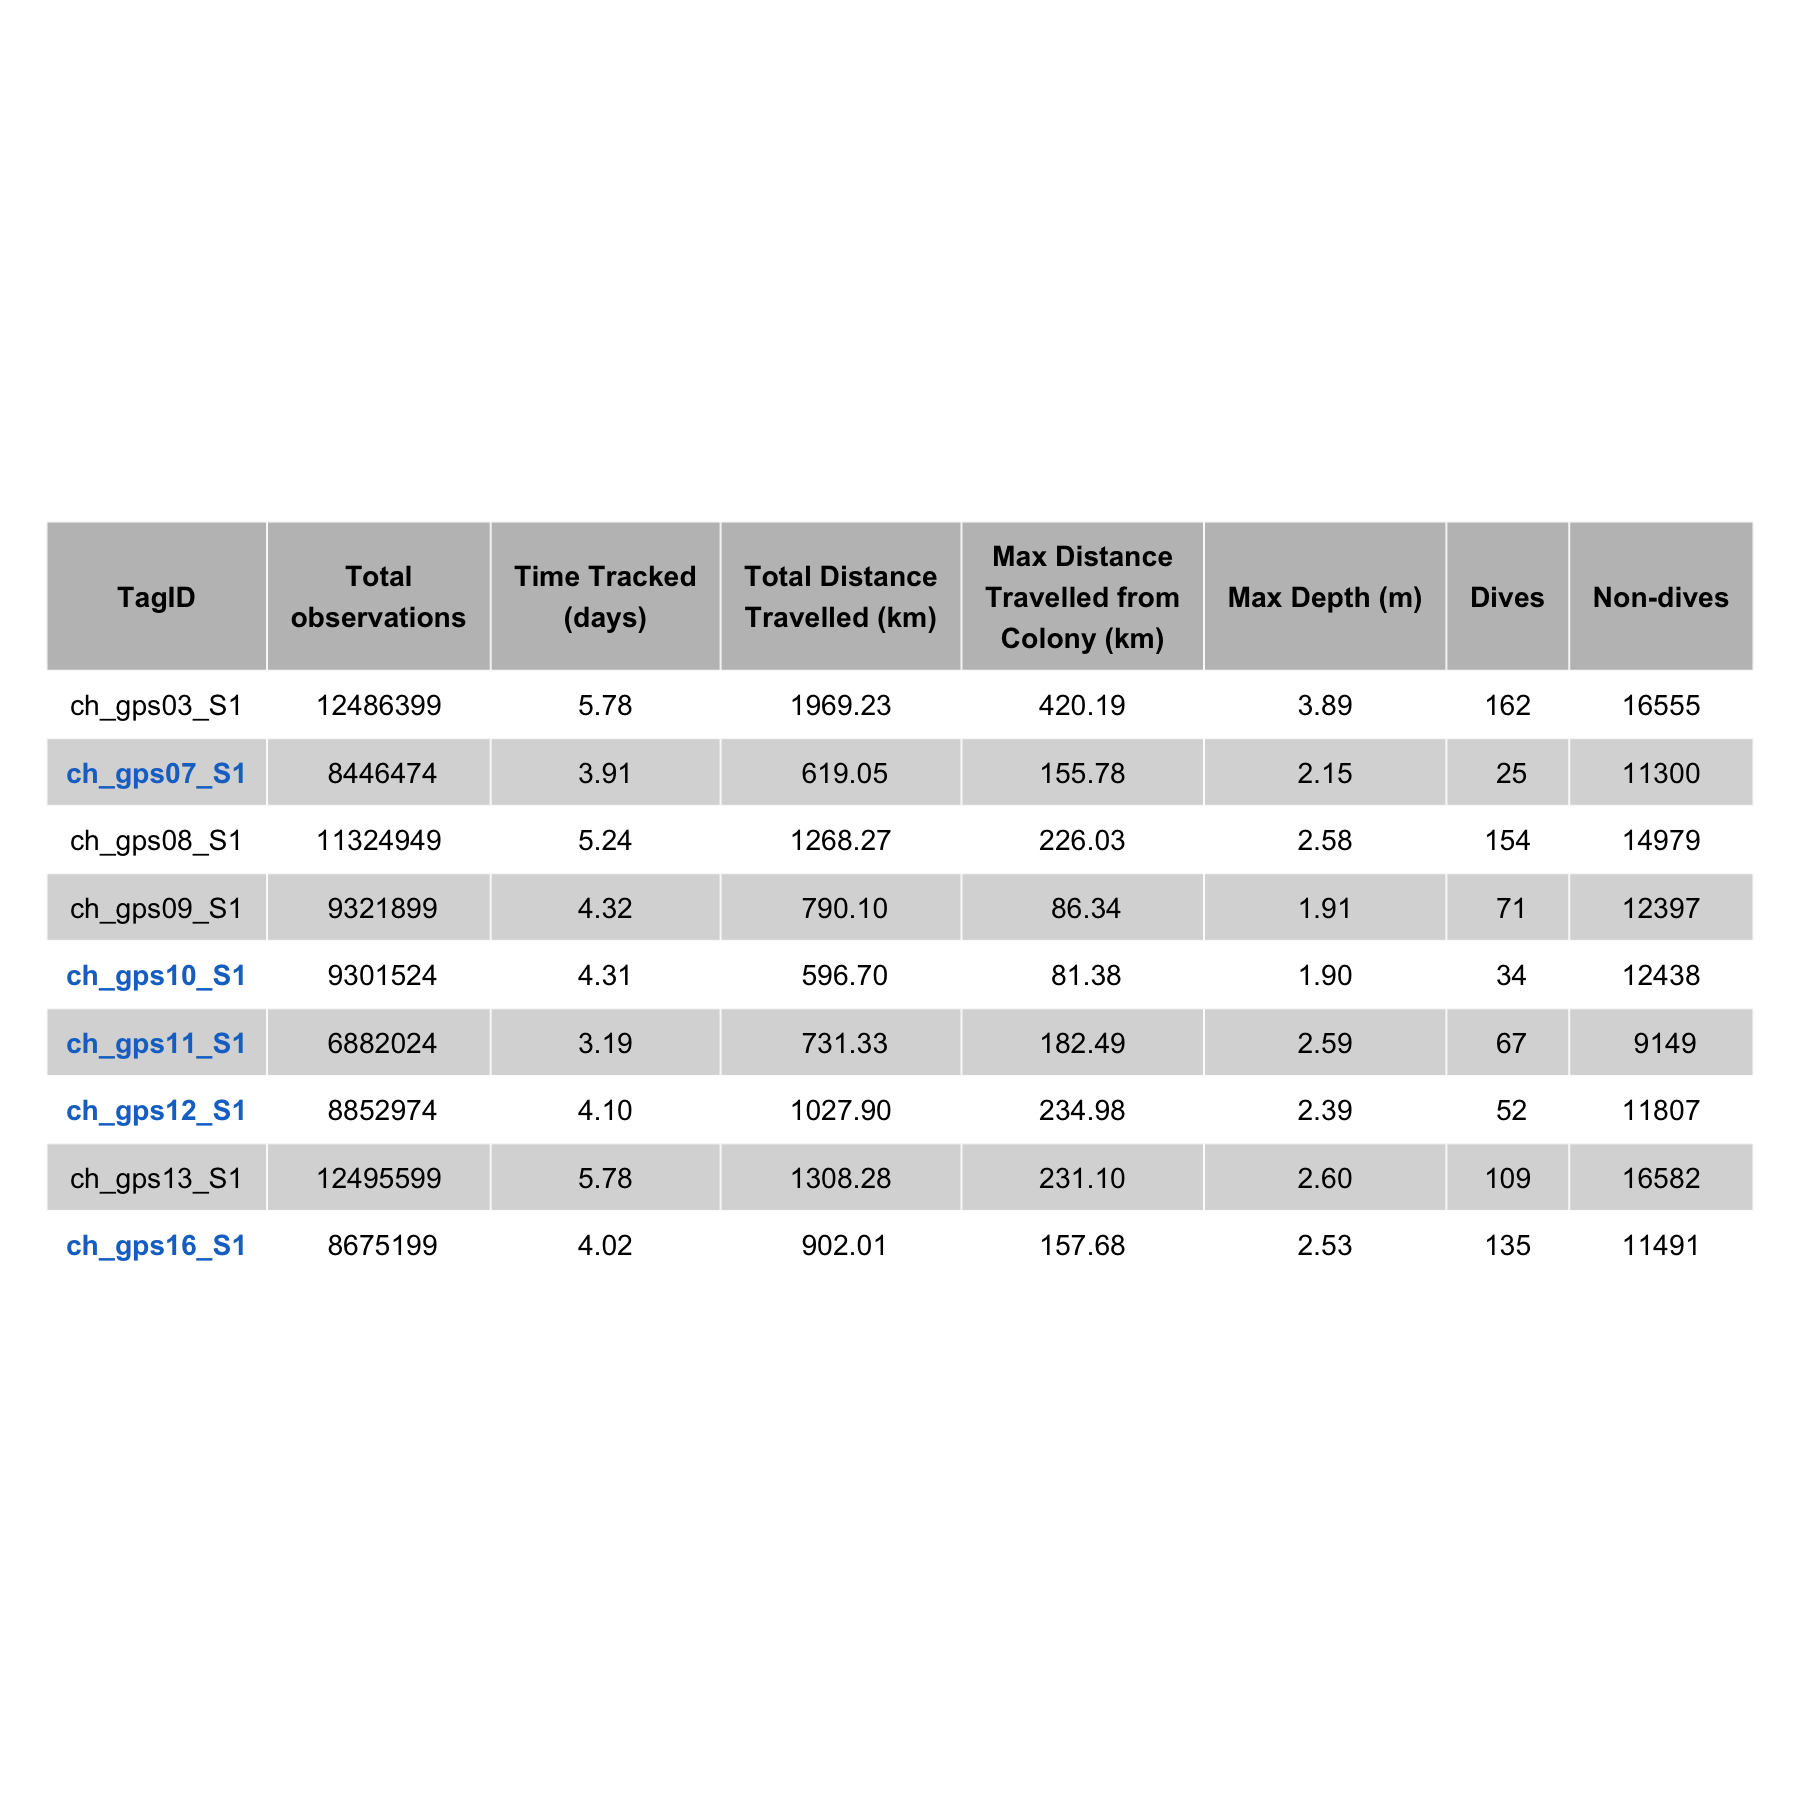

In [329]:
# Grab theme to modify
tt1 = ttheme_default()

# Make table
ts = tableGrob(ss, 
               #cols=gsub("\\ ", "\\\n", names(ss)), 
               rows = NULL,
               theme = modifyList(tt1, list(core=list(bg_params = list(fill = c("white", "grey85")), 
                                                      fg_params = list(fontsize = 17), 
                                                      padding=unit(c(10, 10), "mm")), 
                                            colhead=list(bg_params=list(fill="grey75"), 
                                                        fg_params = list(fontsize = 17), padding=unit(c(10, 10), "mm")
                                                        )))) # Wrap headers

# function for changing reformatting single cell
find_cell <- function(table, row, col, name="core-fg"){
  l <- table$layout
  which(l$t==row & l$l==col & l$name==name)
}

# reformat imm cells
i1 <- find_cell(ts, 3, 1, "core-fg")
i2 <- find_cell(ts, 6, 1, "core-fg")
i3 <- find_cell(ts, 7, 1, "core-fg")
i4 <- find_cell(ts, 8, 1, "core-fg")
i5 <- find_cell(ts, 10, 1, "core-fg")

for (cell in c(i1, i2, i3, i4, i5)){
    ts$grobs[cell][[1]][["gp"]] <- gpar(fontsize = 17, fontface="bold", col = "dodgerblue3")
}


grid.draw(ts)

# Measure dimensions
ts$widths = unit(rep(1/ncol(ts), ncol(ts)), "npc")
th = sum(ts$heights)

**Plot**

In [ ]:
birds = c("ch_gps07_S1", "ch_gps10_S1", "ch_gps11_S1", "ch_gps12_S1", "ch_gps16_S1")

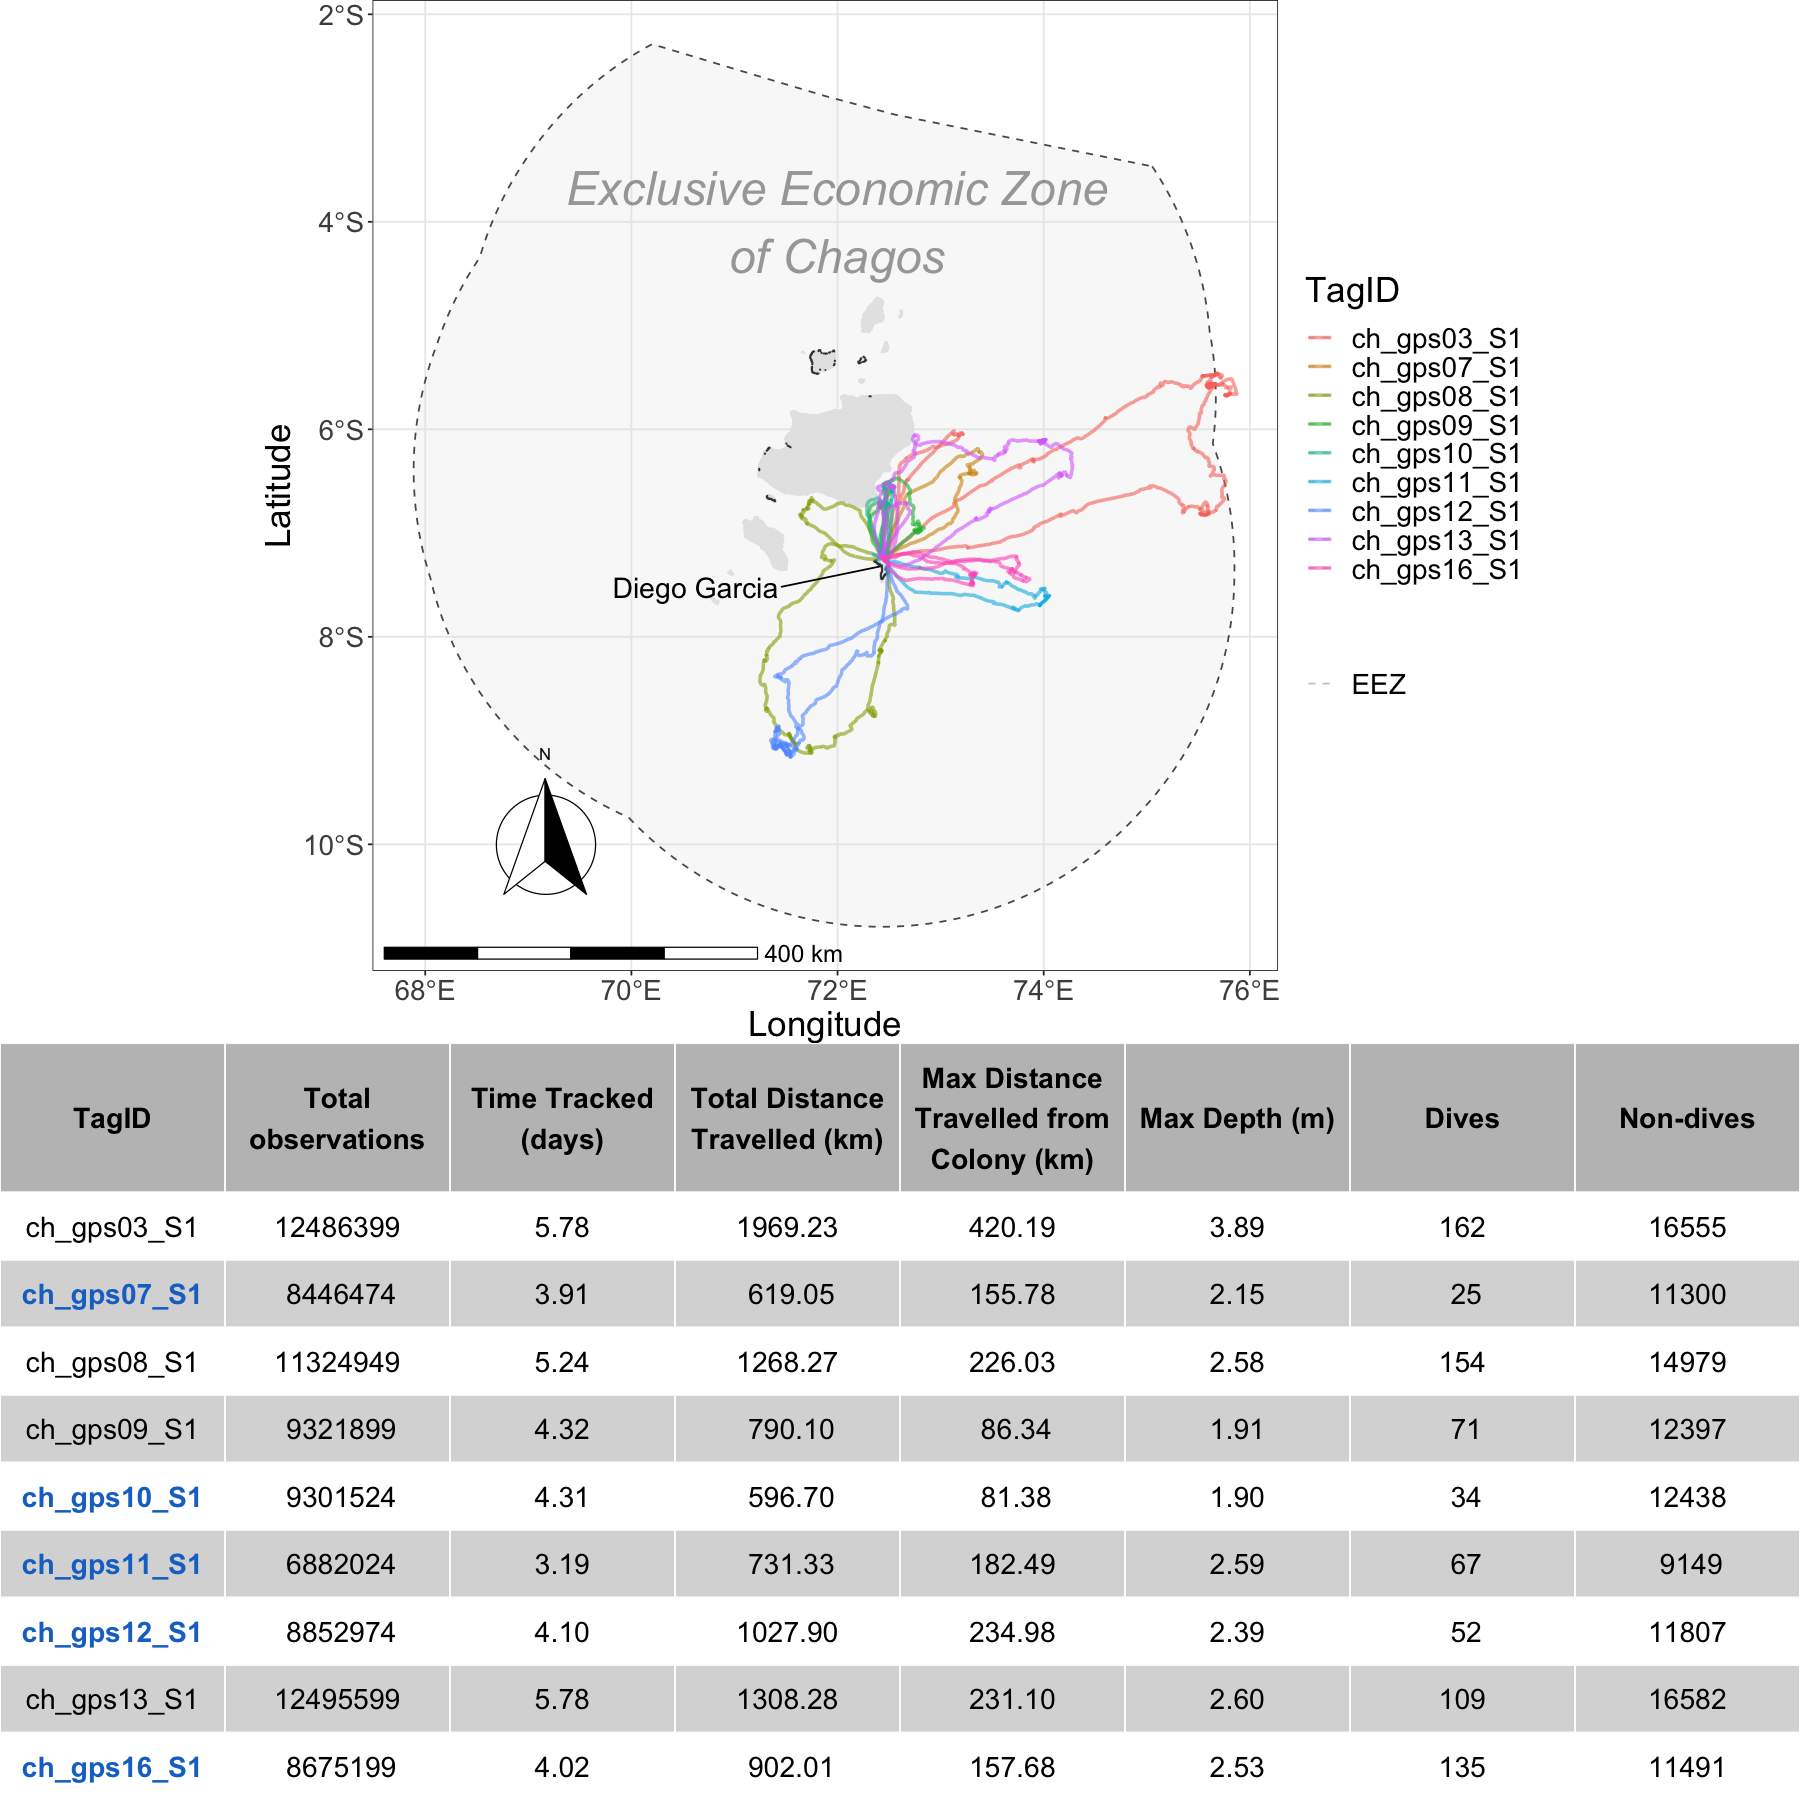

In [330]:
GG = grid.arrange(g, ts, heights=unit.c(unit(1, "null"), th))

**Fig X:** Flight paths for all 9 birds tagged with GPS devices on Diego Garcia in the Exclusive Economic Zone of Chagos (outlined). Summary statistics for each bird are also shown (with one outlier removed where the TDR on bird ... recorded a depth value of over 10m).

**Save**

In [332]:
ggsave(GG, file='../Plots/GPS_X_SUMSTATS.pdf', width = 15, height = 21)

# Model Evaluation Metrics

**Imports**

In [717]:
library(data.table)
library(ggplot2)
library(reshape2)
library(viridis)
library(gridExtra)
library(plyr)
library(stringr)

options(repr.plot.width=15, repr.plot.height=10)  # Resize plot

**Data**

In [718]:
imm.dta.full = fread('../Results_t0.1_NoLUX_RmNA/IMM_WindowComp_XVal_Metrics_Keras.csv')[,1:6] %>% filter(`Window Size (s)`<600)
acc.dta.full = fread('../Results_t0.1_NoLUX_RmNA/ACC_WindowComp_XVal_Metrics_Keras.csv')[,1:6] 

## All Windows

### Table

In [719]:
acc.join = cbind(data.frame(Predictor = c('ACC', rep('', 4))), round(acc.dta.full, 4))
imm.join = cbind(data.frame(Predictor = c('IMM', rep('', 4))), round(imm.dta.full, 4))

acc.imm = rbind(acc.join, imm.join)

# Convert to percentages
for (i in 3:ncol(acc.imm)){
    acc.imm[, i] = paste0(acc.imm[, i] * 100, '%')

}

# Convert to seconds
wdws = acc.imm[,2]
acc.imm[1:5,2] = paste0(wdws[1:5], 's')
acc.imm[6:10,2] = paste0(wdws[6:10]/60, 'min')


colnames(acc.imm)[2] = 'Window Width'

acc.imm

Predictor,Window Width,Accuracy,AUC,Precision,Sensitivity,Specificity
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACC,2s,98.42%,98.96%,98.86%,97.89%,98.94%
,4s,98.5%,98.91%,98.62%,98.33%,98.71%
,6s,98.17%,98.53%,98.43%,97.85%,98.44%
,8s,98.24%,98.53%,97.92%,98.51%,97.96%
,10s,97.45%,97.79%,98.05%,96.71%,98.04%
IMM,1min,81.41%,85.15%,92.02%,67.63%,93.96%
,3min,92.81%,95.7%,91.42%,94.06%,91.22%
,5min,93.67%,96.96%,91.04%,96.62%,90.71%
,7min,93.06%,97.09%,89.36%,97.61%,88.43%


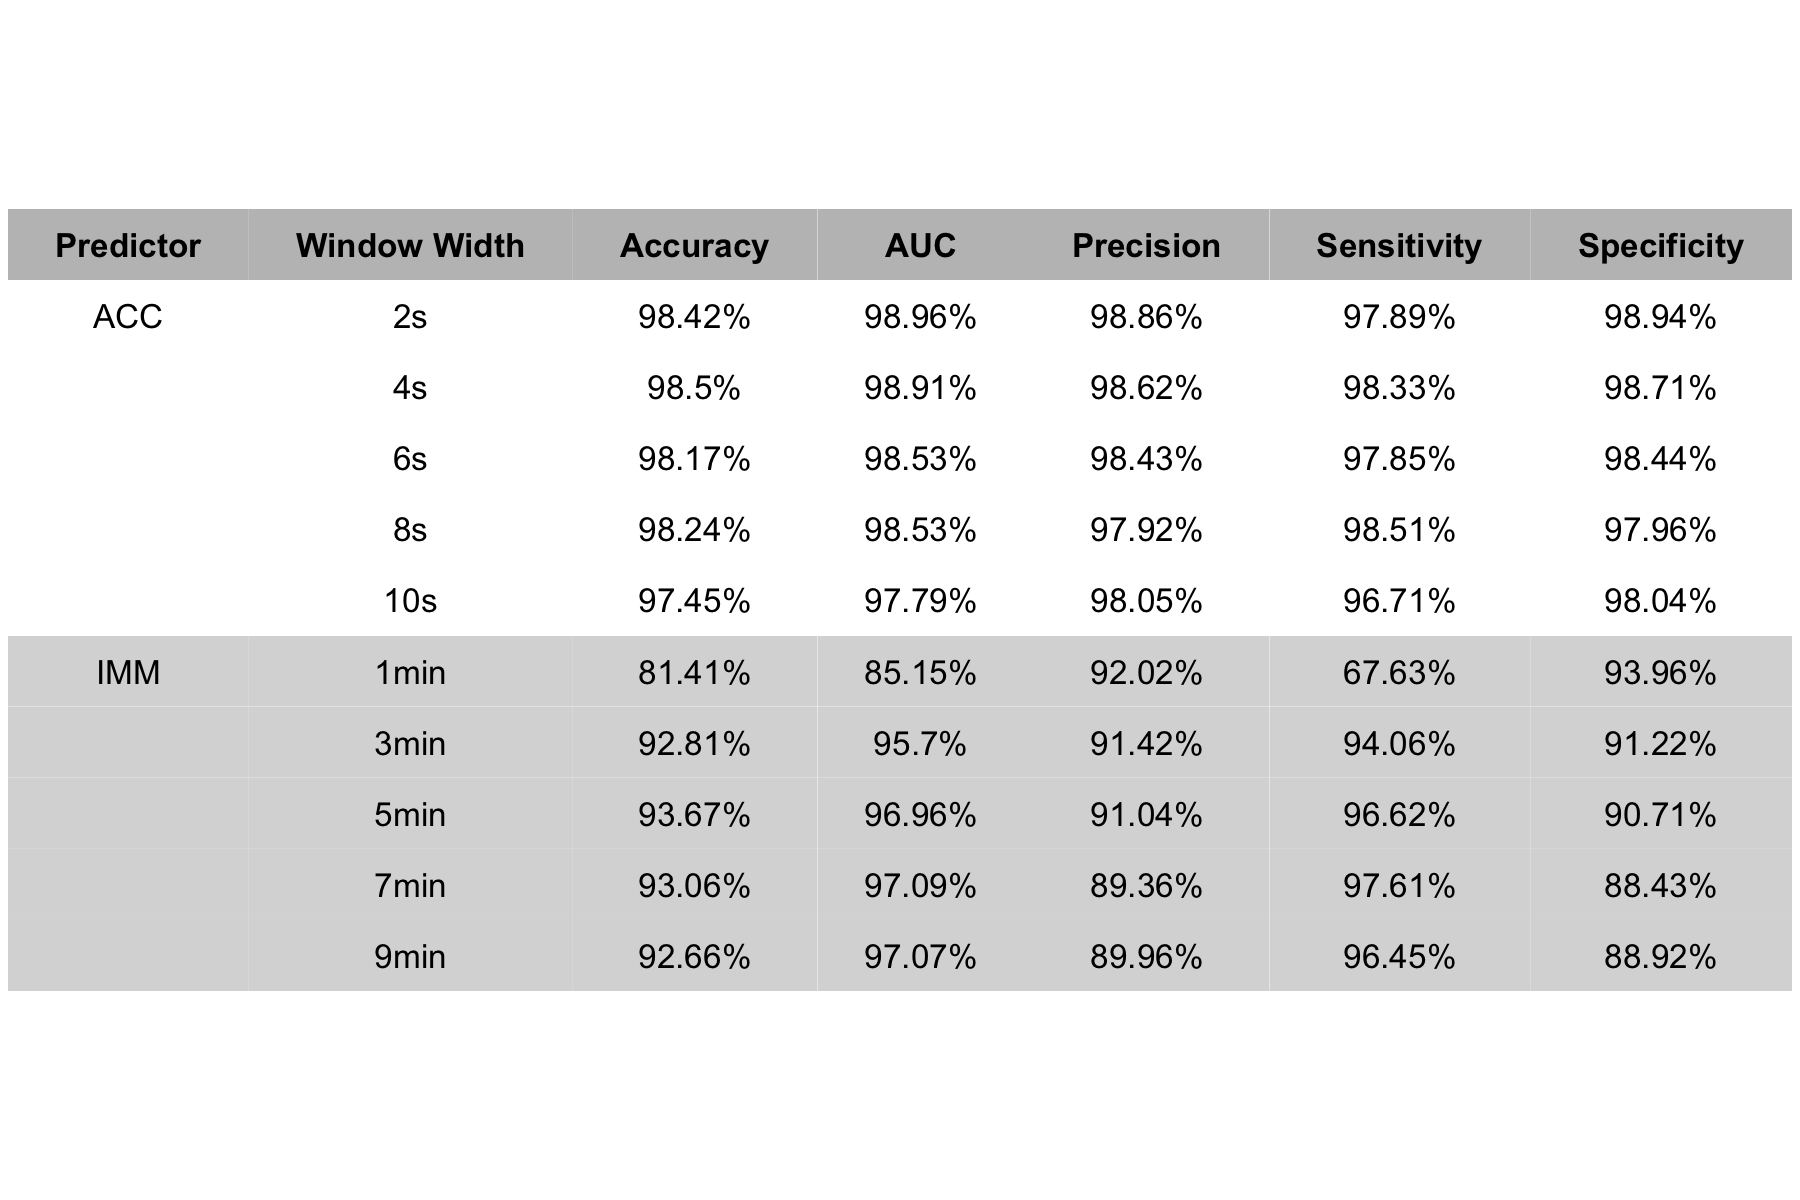

In [720]:
# Grab theme to modify
tt1 = ttheme_default()

# Make table
ts = tableGrob(acc.imm, 
               rows = NULL,
               theme = modifyList(tt1, list(core=list(bg_params = list(fill = c(rep("white", 5), rep("grey85", 5)), lwd = NA), 
                                                      fg_params = list(fontsize = 20), 
                                                      padding=unit(c(20, 10), "mm")), 
                                            colhead=list(bg_params=list(fill="grey75", lwd = NA, col = "grey75"), 
                                                        fg_params = list(fontsize = 20), padding=unit(c(20, 10), "mm")
                                                        )))) # Wrap headers

grid.draw(ts)

**Fig X:** Table of cross-validated, mean classification metrics for each window width tested for each predictor. Using accuracy as a guide, optimal predictions were produced when a 4s window width was used for ACC and a 5min window width was used for IMM.

**Save**

In [619]:
ggsave(ts, file='../Plots/ALL_METRICS_TABLE.pdf', width = 15, height = 7)

### Barplot

**Data wrangling**

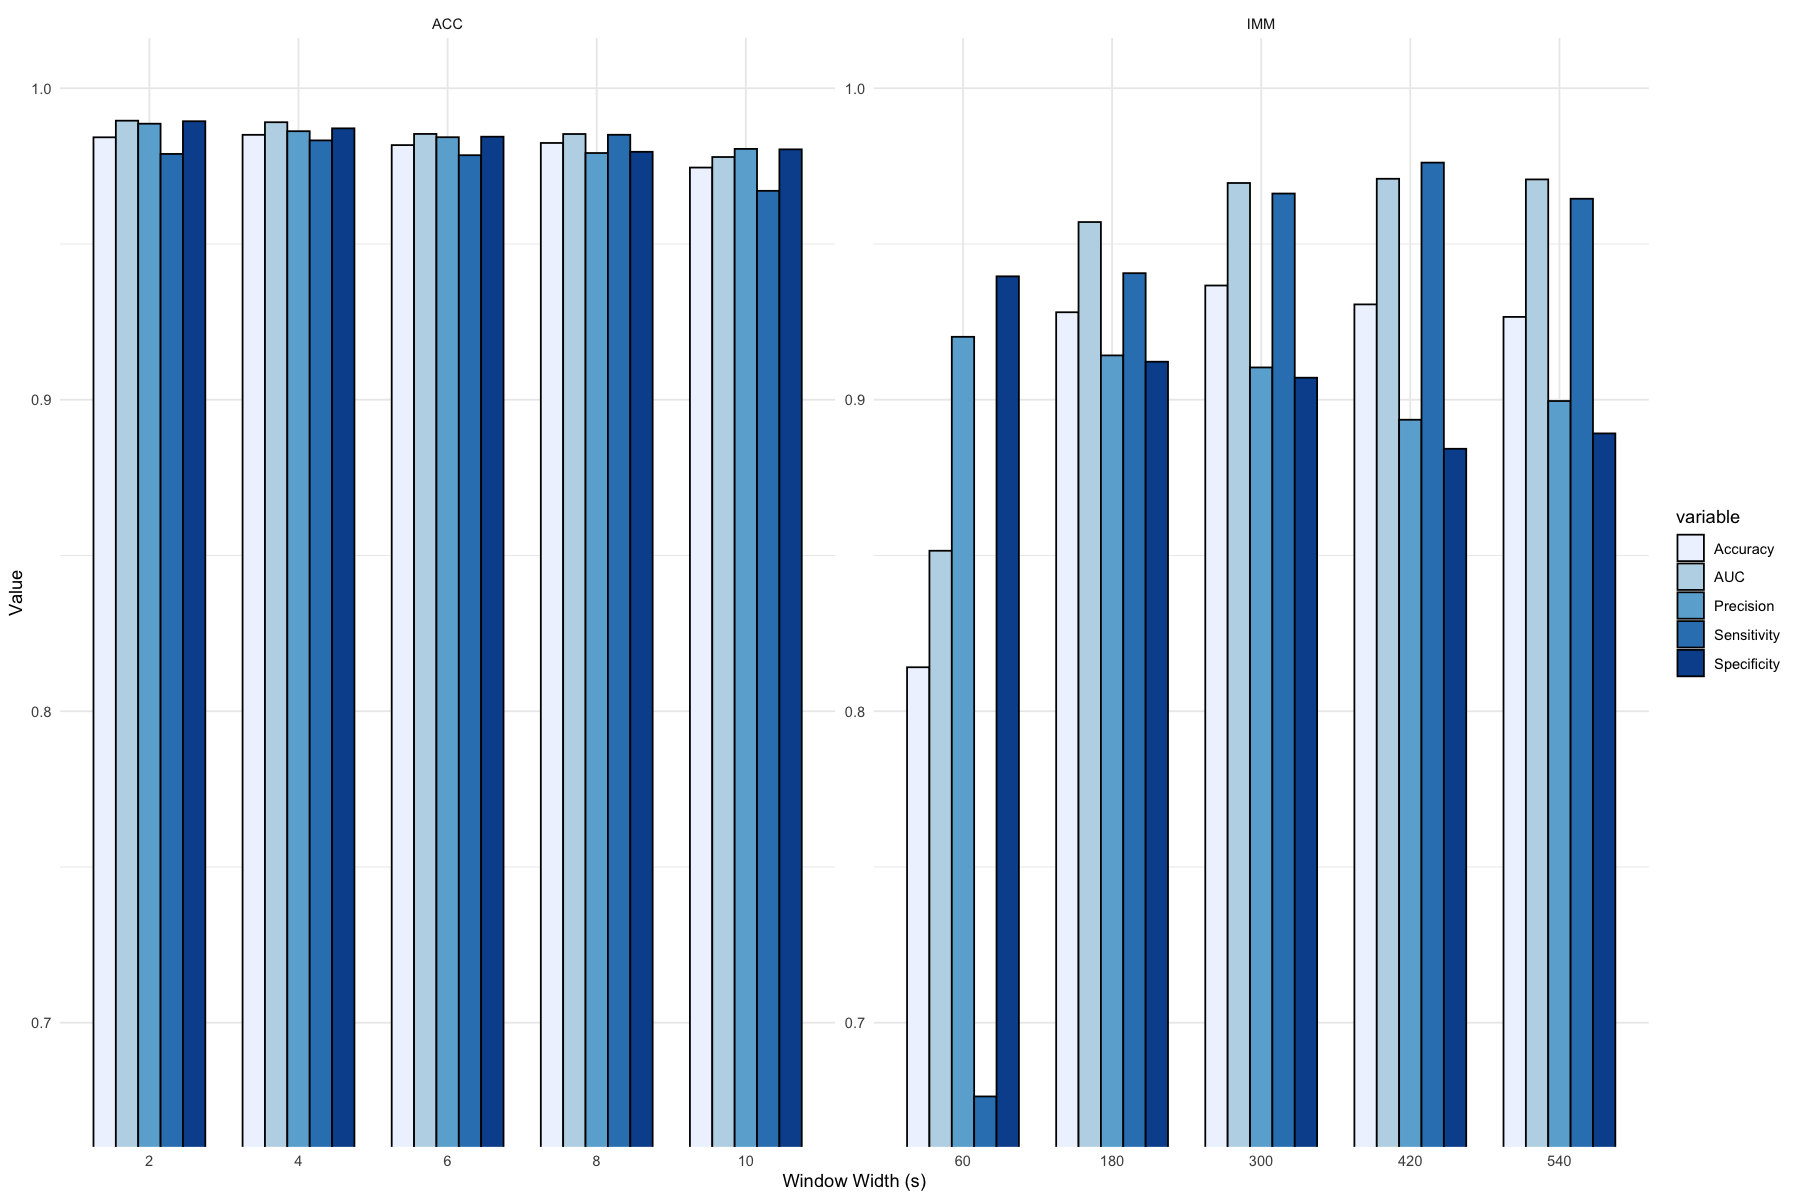

In [721]:
# melt
plot.imm = reshape2::melt(imm.dta.full, id.var = 'Window Size (s)')
plot.imm$dtype = 'IMM'
plot.acc = reshape2::melt(acc.dta.full, id.var = 'Window Size (s)')
plot.acc$dtype = 'ACC'
plot.dta = rbind(plot.imm, plot.acc)

# set clnames and factors
colnames(plot.dta)[1] = 'Window'
plot.dta$Window = as.factor(plot.dta$Window)


# Plot
ggplot(plot.dta, aes(x=Window, y=value, fill=variable, width=.75)) + theme_minimal() +
    geom_bar(position="dodge", stat="identity", color="black") + coord_cartesian(ylim=c(min(plot.dta$value),1)) + 
    xlab('Window Width (s)') + ylab("Value") +
    scale_fill_brewer(palette=1) + facet_wrap(~dtype, scale="free")

## Best Window

In [722]:
# Load data
#cols = c('BirdID', 'Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity')
#acc = fread('../Results/ACC_2_xval_metrics_keras.csv', select = cols, stringsAsFactors = TRUE)
#imm = fread('../Results/IMM_360_xval_metrics_keras.csv', select = cols, stringsAsFactors = TRUE)

wdw.acc = 4
wdw.imm = 300

# threshold = 0.1
cols = c('TagID', 'Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity')
acc = fread(paste0('../Results_t0.1_NoLUX_RmNA/ACC_', wdw.acc, '_xval_metrics_keras.csv'), 
            select = cols, stringsAsFactors = TRUE)
imm = fread(paste0('../Results_t0.1_NoLUX_RmNA/IMM_', wdw.imm, '_xval_metrics_keras.csv'),  
            select = cols, stringsAsFactors = TRUE)

# Melt data
acc.m = melt(acc, id.var = 'TagID')
acc.m$dtype = paste0('ACC ', '(', wdw.acc, 's)')
imm.m = melt(imm, id.var = 'TagID')
imm.m$dtype = paste0('IMM ', '(', wdw.imm/60, 'min)')
plot.dta = rbind(acc.m, imm.m)
plot.dta$TagID = str_remove(plot.dta$TagID, "_gv[0-9]+_?[0-9]+") ## this can be removed also
plot.dta$TagID = str_remove(plot.dta$TagID, "_S1")

**ggplot**

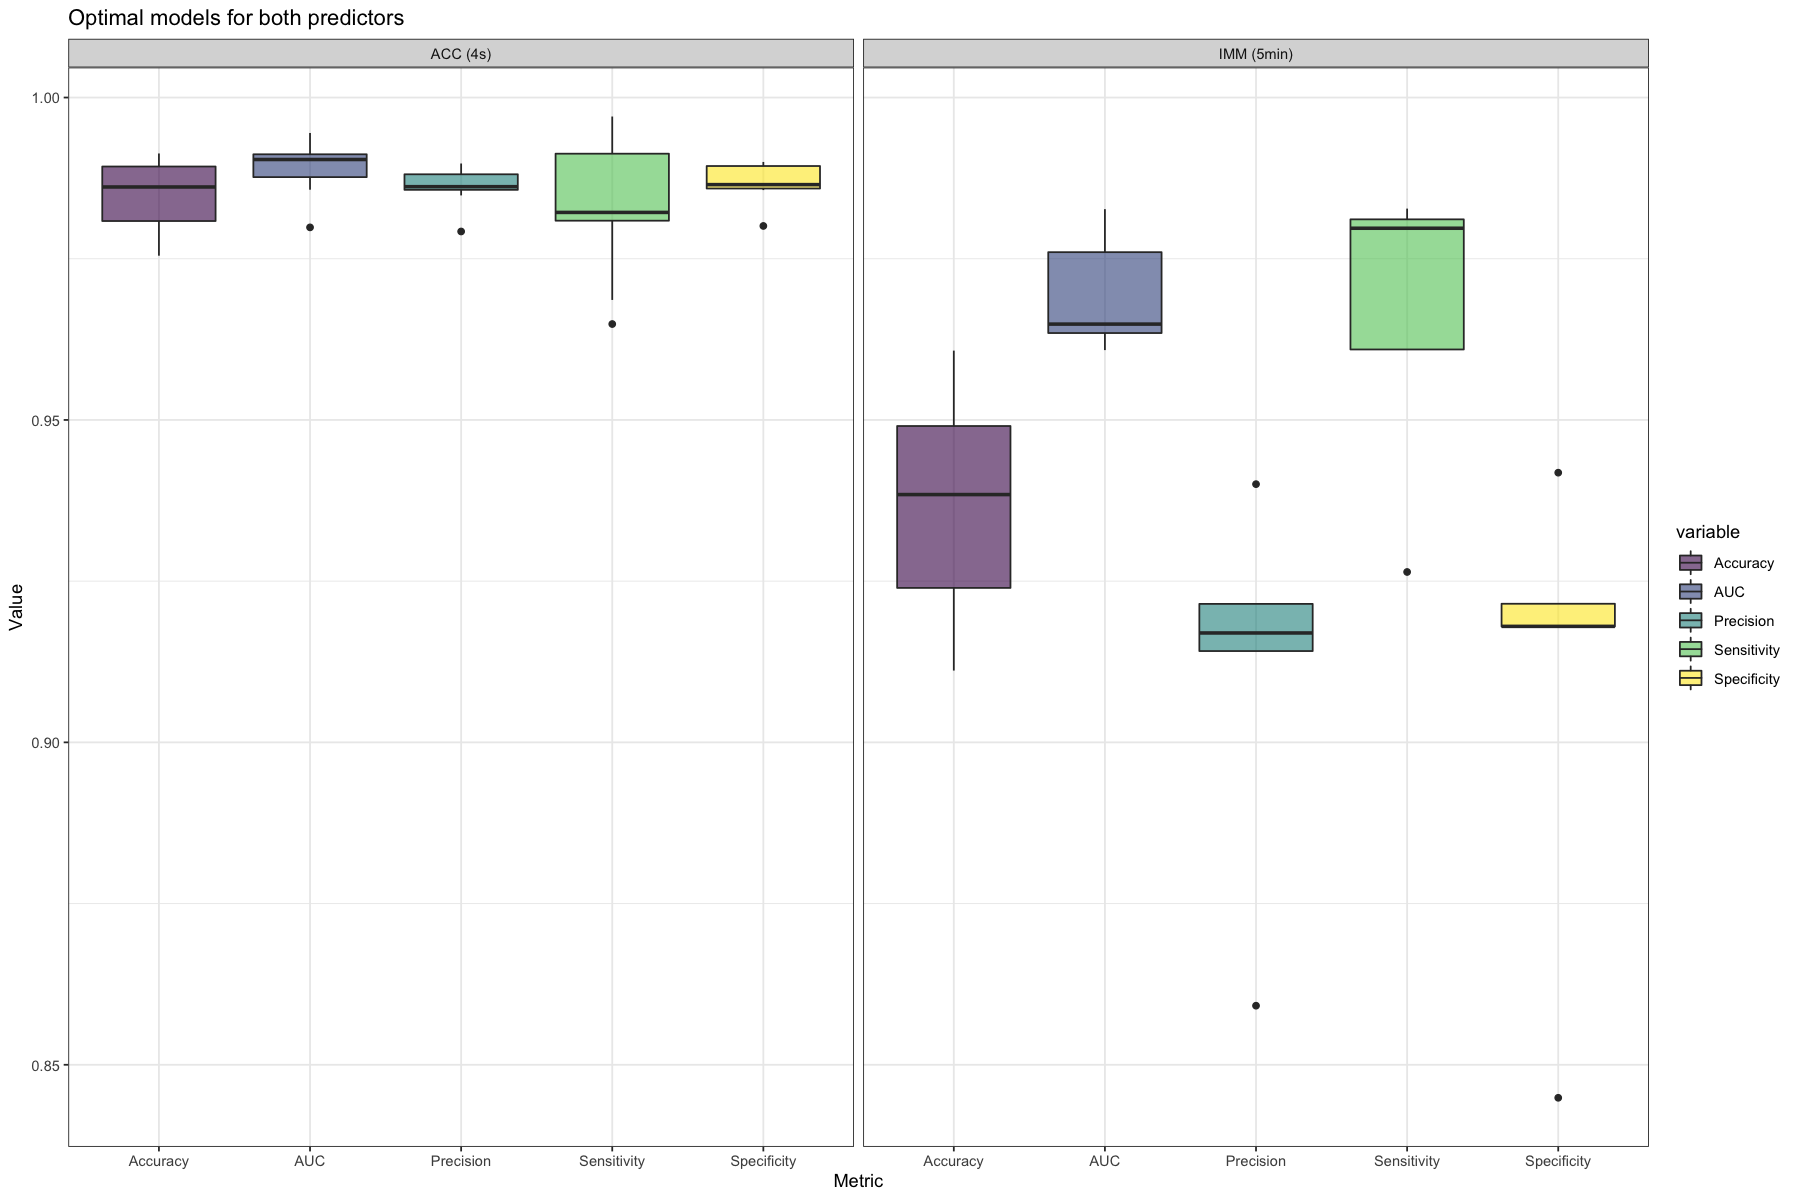

In [723]:
ggplot(data=plot.dta, aes(x=variable, y=value, fill=variable)) + geom_boxplot() + 
  facet_wrap(~dtype) + ggtitle("Optimal models for both predictors") +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    xlab("Metric") + ylab("Value")

**Base plot**

In [628]:
# Prepare a vector of colors with specific color for Nairobi and Eskimo
#myColors <- ifelse(levels(plot.dta$variable)=="Accuracy" , rgb(0.1,0.1,0.7,0.5) , 'white')

nvar = length(unique(plot.dta$variable))

# Split data
plt1 = plot.dta[plot.dta$dtype == paste0('ACC ', '(', wdw.acc, 's)'),]
plt2 = plot.dta[plot.dta$dtype == paste0('IMM ', '(', wdw.imm/60, 'min)'),]


pdf(file="../Plots/BOXPLOT.pdf", width = 10, height = 8)

### Plot ###
par(mfrow = c(1,2), mar = c(6,4,5,2) + 0.1)
ylim = c(min(plot.dta$value), 1)

# Plot 1
boxplot(plt1$value ~ plt1$variable, ylab="Value" , xlab="", col="white", alpha=1, 
        ylim=ylim, las=1, cex.lab=1.6, cex.axis=1.2, cex.main=1.6, cex.sub=0.8, outline=FALSE, 
        main=paste('a)', unique(plt1$dtype)), xaxt='n')
axis(side = 1, labels = FALSE)  #xticks
title(xlab = "Metric", line = 4.5, cex.lab=1.6) #xlab
abline(h = seq(0.8, 1, 0.025), col = "grey")
boxplot(plt1$value ~ plt1$variable, col=terrain.colors(nvar), alpha=0.6, outpch=4, outlwd=2, ylim=ylim, 
        las=1, type = "n", xaxt='n', yaxt='n', add=TRUE)

# Add xlabs
text(x = 1:length(unique(plt1$variable)),
     y = ylim[1]-0.018,
     labels = as.character(unique(plt1$variable)),
     xpd = NA,
     ## Rotate the labels by 45 degrees.
     srt = 45,
     cex = 1.2)


# Add outlier labels
library(plyr)
ys = unlist(dlply(plt1[plt1$variable != 'Accuracy',], 'variable', function(x) min(x$value))) - 0.005
bs = unlist(dlply(plt1[plt1$variable != 'Accuracy',], 'variable', function(x) x$TagID[which.min(x$value)]))
text(x=2:5, y=ys, bs, cex=0.8) 


# Plot 2
boxplot(plt2$value ~ plt2$variable, ylab="Value" , xlab="", col="white", alpha=1, 
        ylim=ylim, las=1, cex.lab=1.6, cex.axis=1.2, cex.main=1.6, cex.sub=0.8, outline=FALSE, 
        main=paste('b)', unique(plt2$dtype)), xaxt='n')
axis(side = 1, labels = FALSE)  #xticks
title(xlab = "Metric", line = 4.5, cex.lab=1.6) #xlab
abline(h = seq(0.8, 1, 0.025), col = "grey")
boxplot(plt2$value ~ plt2$variable, col=terrain.colors(nvar), alpha=0.3, outpch=4, outlwd=2, ylim=ylim, 
        las=1, type = "n", xaxt='n', yaxt='n', add=TRUE)
                  
# Add xlabs
text(x = 1:length(unique(plt2$variable)),
     y = ylim[1]-0.018,
     labels = as.character(unique(plt2$variable)),
     xpd = NA,
     ## Rotate the labels by 45 degrees.
     srt = 45,
     cex = 1.2)

# Add outlier labels
library(plyr)
y1 = max(plt2[plt2$variable == 'Precision',]$value) + 0.005
b1 = plt2[plt2$variable == 'Precision',]$TagID[which.max(plt2[plt2$variable == 'Precision',]$value)]
yrest = unlist(dlply(plt2[!(plt2$variable %in% c('Accuracy', 'AUC')),], 'variable', function(x) min(x$value))) + 0.005
brest = unlist(dlply(plt2[!(plt2$variable %in% c('Accuracy', 'AUC')),], 'variable', function(x) x$TagID[which.min(x$value)]))
yn = max(plt2[plt2$variable == 'Specificity',]$value) + 0.005
bn = plt2[plt2$variable == 'Specificity',]$TagID[which.max(plt2[plt2$variable == 'Specificity',]$value)]
ys = c(y1, yrest, yn)
bs = c(b1, brest, bn)
text(x=c(3, 3:5, 5), y=ys, bs, cex=0.8) 
                     
dev.off()

pdf 
  2

**FIG X:** Box plots showing the distribution of classification metrics over the cross-validation process for the optimal window width for each precitor. With the leave-one-out cross-validation method employed, each point corresponds to a different bird withheld. Outliers are labelled.

In [580]:
?title

# Confusion Matrix

**Imports**

In [476]:
library(data.table)
library(dplyr)
library(caret)
library(cvms)

options(repr.plot.width=5, repr.plot.height=5)  # Resize plot

### Plot

In [477]:
# Load cm data
#cm = fread('../Results/ACC_WindowComp_XVal_Metrics_Keras.csv') %>% 
#        filter(`Window Size (s)` == 2) %>%
#        select("TruePos (%)", "FalsePos (%)", "FalseNeg (%)", "TrueNeg (%)")

# threshold = 0.1
cm = fread('../Results_t0.1_NoLUX_RmNA/ACC_WindowComp_XVal_Metrics_Keras.csv') %>% 
        filter(`Window Size (s)` == 2) %>%
        select("TruePos (%)", "FalsePos (%)", "FalseNeg (%)", "TrueNeg (%)")

# Plot
#cmat = as.table(matrix(round(as.numeric(cm), 1), nrow = 2, byrow = TRUE))
d = 'Dive'
nd = 'Non-dive'

cm.up = round(as.numeric(cm), 1) * 10

# Generate caret confusion matrix
true = c(rep(d, cm.up[1]), rep(nd, cm.up[2]), rep(d, cm.up[3]), rep(nd, cm.up[4]))
pred = c(rep(d, cm.up[1]+cm.up[2]), rep(nd, cm.up[3]+cm.up[4]))
cm = confusionMatrix(as.factor(pred), as.factor(true))$table

**Fourfoldplot**

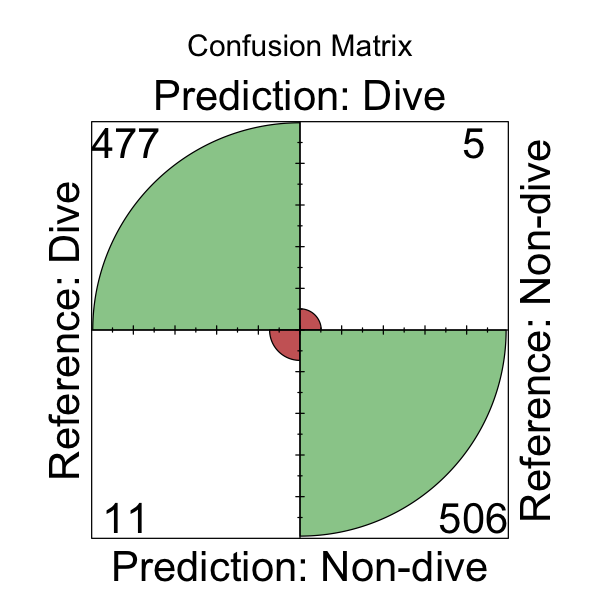

In [356]:
fourfoldplot(cm, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix", std = c("margins", "ind.max", "all.max"))

**cvms**

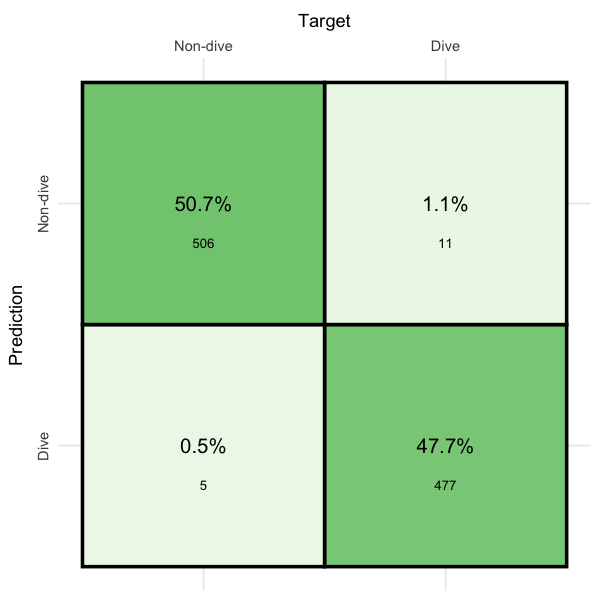

In [357]:
cfm = as_tibble(cm)
plot_confusion_matrix(cfm, 
                      target_col = "Reference", 
                      prediction_col = "Prediction",
                      counts_col = "n"
                      #, class_order = c("Non-dive", "Dive")
                      , add_row_percentages = FALSE
                      , add_col_percentages = FALSE
                      , add_zero_shading = TRUE
                      #, add_sums = TRUE
                      #, add_counts = FALSE
                      , palette = "Greens"
                      #, intensity_by = "counts"
                      #, rotate_y_text = FALSE
                      , tile_border_color = 'black'
                      , tile_border_size = 1
                      , darkness = 0.4 
                
                     )

**Ggplot tile plot**

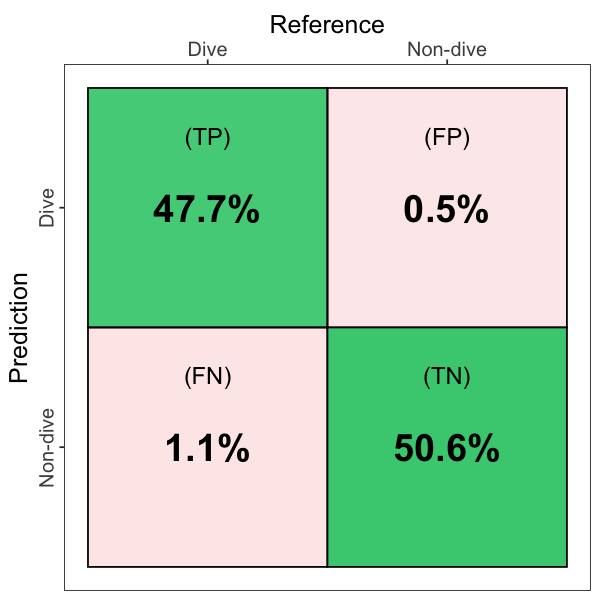

In [358]:
table <- data.frame(cm)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

plotTable$Perc = plotTable$Freq/10

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
g1 = ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = Perc)) +
  geom_tile(colour='black', size=0.5) +
  geom_text(aes(label = paste0(Perc, '%')), vjust = .5, fontface  = "bold", alpha = 1, size = 8) +
  geom_text(aes(label = c("(TP)", "(FN)", "(FP)", "(TN)")), alpha = 1, position=position_nudge(x = 0, y = 0.3)
, size = 5) +
  scale_fill_manual(values = c(good = "seagreen3", bad = "red2")) +
  theme_bw() +
  scale_x_discrete(lim = levels(table$Reference), position = "top") +
  ylim(rev(levels(table$Reference))) +
  theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
       axis.text.y = element_text(angle = 90, hjust = 0.5)
        , text = element_text(size=15)
       # , plot.title = element_text(hjust = 0.5)
       ) #+
  #ggtitle("Confusion Matrix") +
  #labs(caption = "text")
  
g1

* Write specific metrics underneath (in ggplot or LaTeX?)

**Fig. X:** Scaled confusion matrix showing the distribution of errors made by the 300s immersion window classifier accross the full leave-one-out cross-validation process.

### ACC & IMM

In [479]:
options(repr.plot.width=10, repr.plot.height=6.5)  # Resize plot

TableGrob (1 x 2) "arrange": 2 grobs
    z     cells    name           grob
ACC 1 (1-1,1-1) arrange gtable[layout]
IMM 2 (1-1,2-2) arrange gtable[layout]

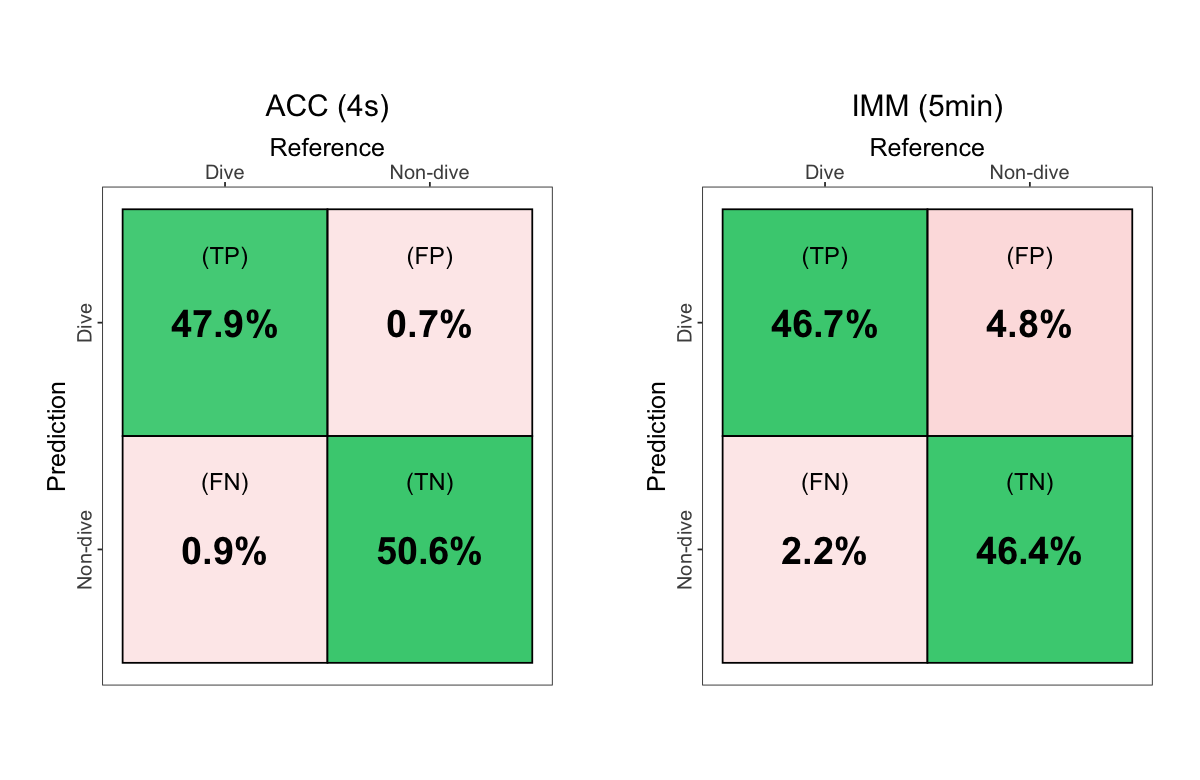

In [480]:
res.sum.files = list.files("../Results_t0.1_NoLUX_RmNA/", 
                           pattern = "_WindowComp_XVal_Metrics_Keras.csv", 
                           full.names = TRUE)

cm.plts = list()

for (f in res.sum.files){
  
    dtype = substr(basename(f), 1, 3) 
    t = fread(f)
    t = t[which.max(t$Accuracy),]  # Max accuracy
    wdw = t$`Window Size (s)`  # window size
    
    head = ifelse(dtype == 'ACC', paste0(dtype, ' (', wdw, 's)'), paste0(dtype, ' (', wdw/60, 'min)'))
    
    cm = t %>% select("TruePos (%)", "FalsePos (%)", "FalseNeg (%)", "TrueNeg (%)")
    
    d = 'Dive'
    nd = 'Non-dive'
    cm.up = round(as.numeric(cm), 1) * 10
    
    # Generate caret confusion matrix
    true = c(rep(d, cm.up[1]), rep(nd, cm.up[2]), rep(d, cm.up[3]), rep(nd, cm.up[4]))
    pred = c(rep(d, cm.up[1]+cm.up[2]), rep(nd, cm.up[3]+cm.up[4]))
    cm = confusionMatrix(as.factor(pred), as.factor(true))$table
    
    
    table <- data.frame(cm)

    plotTable <- table %>%
      mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
      group_by(Reference) %>%
      mutate(prop = Freq/sum(Freq))
    
    plotTable$Perc = plotTable$Freq/10
    
    # fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
    g = ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = Perc)) +
      geom_tile(colour='black', size=0.5) +
      geom_text(aes(label = paste0(Perc, '%')), vjust = .5, fontface  = "bold", alpha = 1, size = 8) +
      geom_text(aes(label = c("(TP)", "(FN)", "(FP)", "(TN)")), alpha = 1, position=position_nudge(x = 0, y = 0.3), size = 5) +
      scale_fill_manual(values = c(good = "seagreen3", bad = "red2")) +
      theme_bw() +
      scale_x_discrete(lim = levels(table$Reference), position = "top") +
      ylim(rev(levels(table$Reference))) +
      theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
            axis.text.y = element_text(angle = 90, hjust = 0.5), text = element_text(size=15),
            plot.title = element_text(hjust = 0.5)
           ) +
      #ggtitle(paste("Confusion Matrix", dtype))
      ggtitle(head)
    
    cm.plts[[dtype]] = g
    
}

#grid.arrange(cm.plts[['ACC']], cm.plts[['IMM']], ncol = 2)

margin = theme(plot.margin = unit(c(2,1,2,1), "cm"))
CM = grid.arrange(grobs = lapply(cm.plts, "+", margin), ncol=2)
CM

**Save**

In [519]:
ggsave(CM, file='../Plots/CM.pdf', width = 10, height = 6)

# GLS Data

**Imports**

In [630]:
library(FLightR)
library(GeoLight)
library(gridExtra)
library(ggplot2)

**Load/subset data**

In [631]:
gls = fread('../Data/GLS Data 2019 Jan DG RFB Short-term/matched/IMM_ch_gps16_S1.csv', na.strings=c("","NA"))
gls$datetime = gls$datetime + 5*60*60  # Add 5 hours for timezone

#attr(gls$datetime, "tzone") = "Indian/Maldives"   # change tzone?
imm = gls[!is.na(`wet/dry`)]
lux = na.omit(gls)

# Make wt/dry col integers
imm$`wet/dry`[imm$`wet/dry`=='wet'] = 1
imm$`wet/dry`[imm$`wet/dry`=='dry'] = 0
imm$`wet/dry` = as.numeric(imm$`wet/dry`)

# Get twilight
twilight = twilightCalc(lux$datetime, lux$`light(lux)`, LightThreshold = TRUE, 
                        maxLight = 5, ask = FALSE, nsee = 500, allTwilights = FALSE)  # change points

**Plot**

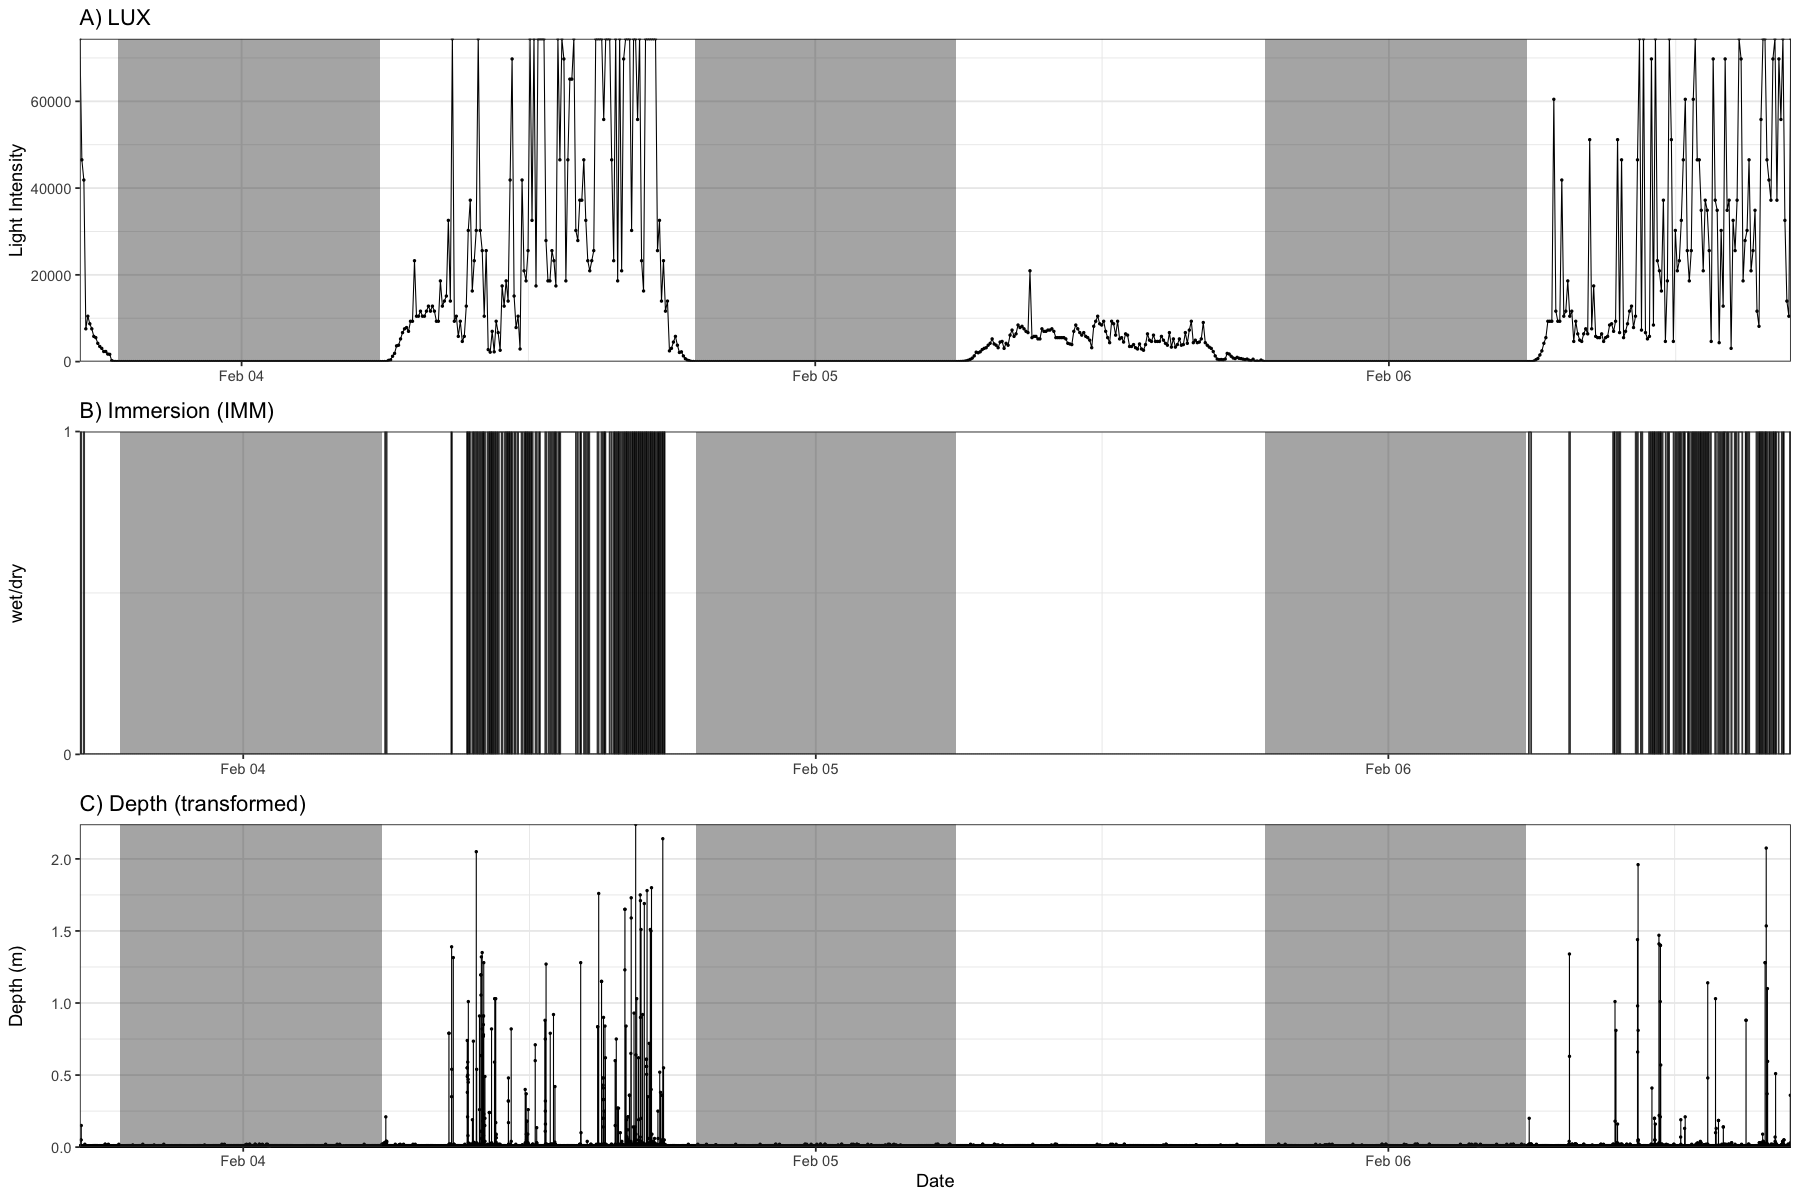

In [632]:
# Plot lux
g1 <- ggplot(data=lux, aes(x=datetime, y=`light(lux)`)) +
    ggtitle("A) LUX") + 
    geom_line(size=0.3) +
    geom_point(size=0.3) + 
    geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
            aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
    scale_x_datetime(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0)) + 
    ylab("Light Intensity") +
    theme(axis.title.x=element_blank())

# Plot wet/dry
g2 <- ggplot(imm) +  geom_step(aes(x=datetime , y=`wet/dry`),alpha=0.8) +
    ggtitle("B) Immersion (IMM)") + 
    geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
            aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') +
    scale_x_datetime(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0), breaks=c(0,1)) + 
    ylab("wet/dry") +
    theme(axis.title.x=element_blank())

g3 <- ggplot(gls, aes(x = datetime, y = Depth_mod))  +  
    geom_line(size = 0.3) + 
    geom_point(size=0.3) + 
    ggtitle("C) Depth (transformed)") + 
    geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
            aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
    scale_x_datetime(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0)) +
    ylab("Depth (m)") +
    xlab("Date")

gA <- ggplotGrob(g1)
gB <- ggplotGrob(g2)
gC <- ggplotGrob(g3)


grid::grid.newpage()
#pdf('../Plots/GLS_EXAMPLE_PLOT.pdf')
grid::grid.draw(rbind(gA, gB, gC))
#dev.off()

#library(gridExtra)
#grid.arrange(g1, g2, g3) 

#+ scale_x_continuous(xx)
  #theme(axis.text.x= element_text(as.POSIXct(lux$datetime, tz = "Indian/Maldives")))


**Fig .X:** Example distribution of A) light level data; B) salt-water immersion data; and C) depth data for a single bird over the period it was tracked (*ch_gps16*). Dark (night-time) periods are shown shaded grey. The plot shows how the bird iteracts with the water exclusively during daylight hours and spends the whole of Feb 05 off the water, likely staying in a relatively shaded area around the nest. Diving events correlate strongly with periods immersed. 

**Save plots for all files:**

In [245]:
files =  list.files("../Data/GLS Data 2019 Jan DG RFB Short-term/matched/", pattern = "IMM*", full.names = TRUE)

for (f in files){
    gls = fread(f, na.strings=c("","NA"))
    gls$datetime = gls$datetime + 5*60*60  # Add 5 hours for timezone
    #attr(gls$datetime, "tzone") = "Indian/Maldives"   # change tzone?
    imm = gls[!is.na(`wet/dry`)]
    lux = na.omit(gls)

    # Make wt/dry col integers
    imm$`wet/dry`[imm$`wet/dry`=='wet'] = 1
    imm$`wet/dry`[imm$`wet/dry`=='dry'] = 0
    imm$`wet/dry` = as.numeric(imm$`wet/dry`)

    # Get twilight
    twilight = twilightCalc(lux$datetime, lux$`light(lux)`, LightThreshold = TRUE, 
                            maxLight = 5, ask = FALSE, nsee = 500, allTwilights = FALSE)  # change points
    
    # Plot lux
    g1 <- ggplot(data=lux, aes(x=datetime, y=`light(lux)`)) +
        ggtitle("LUX") + 
        geom_line(size=0.3) +
        geom_point(size=0.3) + 
        geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
                aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
        scale_x_datetime(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0)) + 
        ylab("Light Intensity") +
        theme(axis.title.x=element_blank())

    # Plot wet/dry
    g2 <- ggplot(imm) +  geom_step(aes(x=datetime , y=`wet/dry`),alpha=0.8) +
        ggtitle("Immersion") + 
        geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
                aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') +
        scale_x_datetime(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0), breaks=c(0,1)) + 
        ylab("Wet/Dry (1/0)") +
        theme(axis.title.x=element_blank())

    g3 <- ggplot(gls, aes(x = datetime, y = Depth_mod))  +  
        geom_line(size = 0.3) + 
        geom_point(size=0.3) + 
        ggtitle("Depth (transformed)") + 
        geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
                aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
        scale_x_datetime(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0)) +
        ylab("Depth (m)") +
        xlab("Date/time")

    gA <- ggplotGrob(g1)
    gB <- ggplotGrob(g2)
    gC <- ggplotGrob(g3)
    
    out = paste0("../Plots/GLS_data_", tools::file_path_sans_ext(basename(f)), ".pdf")

    grid::grid.newpage()
    pdf(out)
    grid::grid.draw(rbind(gA, gB, gC))
    dev.off()
}

# Facet-wrapped IMM Histogram

In [814]:
library(data.table)
library(dplyr)
library(caret)

options(repr.plot.width=10, repr.plot.height=10)  # Resize plot

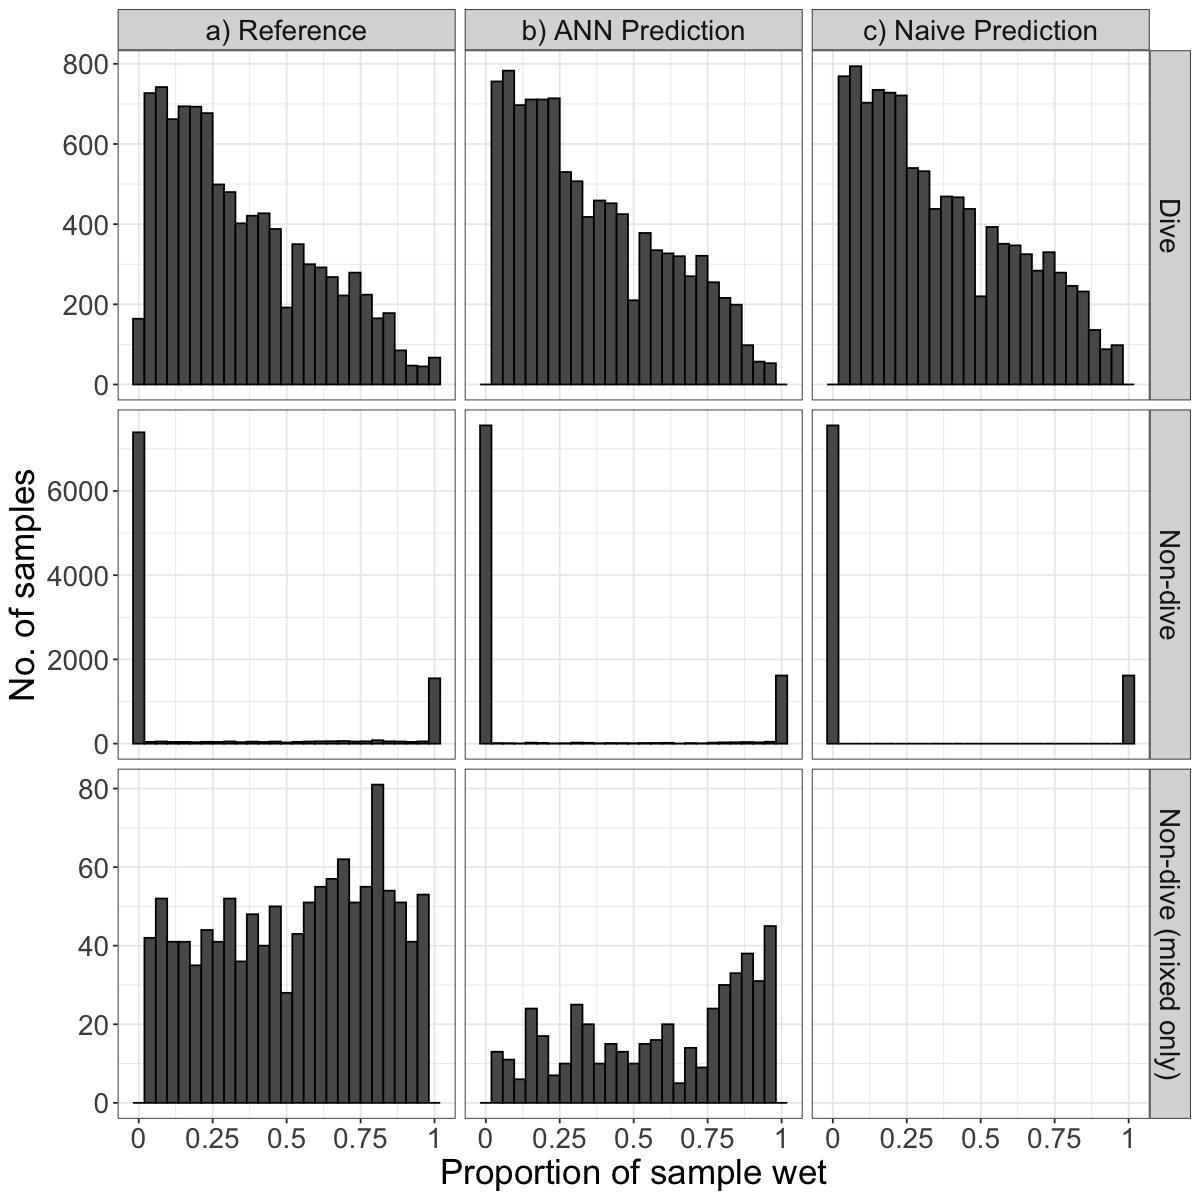

In [816]:
pred = fread('../Results_t0.1_NoLUX_RmNA/IMM_300_xval_predictions.csv')
dta = fread('../Data/Reduced/IMM300_reduced_all_dives.csv')
joint = left_join(dta, pred, by = c("TagID", "ix"))

imm = joint %>% select(-c('TagID', 'ix', 'Dive', 'Prediction'))

prop.wet = rowSums(imm)/ncol(imm)  # proportion of row wet

joint$NaivePrediction = fifelse(prop.wet %in% c(0,1), 0, 1)  # Naive classifier

# Melt (kinda)
j1 = joint %>% select(-c('Prediction', 'NaivePrediction'))
colnames(j1)[ncol(j1)] = 'value'
j1$Type = 'a) Reference'

j2 = joint %>% select(-c('Dive', 'NaivePrediction'))
colnames(j2)[ncol(j2)] = 'value'
j2$Type = 'b) ANN Prediction'

j3 = joint %>% select(-c('Dive', 'Prediction'))
colnames(j3)[ncol(j3)] = 'value'
j3$Type = 'c) Naive Prediction'


plt.dta = rbind(j1, j2, j3) #%>% select(value, Type)
plt.dta$prop_wet = rep(prop.wet, 3)


plt.dta$value[plt.dta$value == 1] = 'Dive'
plt.dta$value[plt.dta$value == 0] = 'Non-dive'

# j4
j4 = plt.dta %>% filter(value == 'Non-dive' & !(prop_wet %in% c(0, 1)))
j4$value = 'Non-dive (mixed only)'
plt.dta = rbind(plt.dta, j4)

# Set factors
plt.dta$value = factor(plt.dta$value, levels = c('Dive', 'Non-dive', 'Non-dive (mixed only)')) 
plt.dta$Type = factor(plt.dta$Type, levels = c('a) Reference', 'b) ANN Prediction', 'c) Naive Prediction')) 

# scale function to drop needless decimals for integers on x axis
scaleFUN <- function(x) fifelse(x%%1==0, round(x), x)

g = ggplot(plt.dta, aes(plt.dta$prop_wet)) +
  geom_histogram(bins=27, col ='black') + 
  xlab("Proportion of sample wet") + 
  ylab("No. of samples") + 
  facet_grid(value ~ Type, scales = "free") +
  theme(text = element_text(size=21)) + 
  scale_x_continuous(labels=scaleFUN)

g

**Fig X:** Histograms showing the disribution of wet/dry samples accross all 5min windows used in the reduced IMM dataset, and how they were classfied by: A) their corresponding labels; B) the neural network; and C) the naive classifier.

**Homogenous samples:**
* Nearly all homogenous sample windows (i.e. all wet/dry) are non-dives.
    * The model is simply classifying all those as non-dives, meaning its the intermediates that the model is discriminating.

**Save**

In [713]:
ggsave(g, file='../Plots/FACET_HISTOGRAM.pdf', width = 10, height = 10)

## Naive Classifier

In [753]:
# Naive classifier
joint$NaivePrediction = fifelse(prop.wet %in% c(0,1), 0, 1)  # Naive classifier

# Set factors
joint$NaivePrediction = factor(joint$NaivePrediction, levels = c(1, 0))
joint$Dive = factor(joint$Dive, levels = c(1, 0)) 
joint$Prediction = factor(joint$Prediction, levels = c(1, 0)) 

# Confusion Matrix
cat('\n-------------ARTIFICIAL NEURAL NETWORK------------\n')
confusionMatrix(joint$Prediction, joint$Dive)
cat('\n------------------NAIVE CLASSIFIER----------------\n')
confusionMatrix(joint$NaivePrediction, joint$Dive)


-------------ARTIFICIAL NEURAL NETWORK------------


Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1 9259  943
         0  431 9204
                                          
               Accuracy : 0.9307          
                 95% CI : (0.9271, 0.9342)
    No Information Rate : 0.5115          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8616          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9555          
            Specificity : 0.9071          
         Pos Pred Value : 0.9076          
         Neg Pred Value : 0.9553          
             Prevalence : 0.4885          
         Detection Rate : 0.4668          
   Detection Prevalence : 0.5143          
      Balanced Accuracy : 0.9313          
                                          
       'Positive' Class : 1               
                        


------------------NAIVE CLASSIFIER----------------


Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1 9459 1204
         0  231 8943
                                         
               Accuracy : 0.9277         
                 95% CI : (0.924, 0.9312)
    No Information Rate : 0.5115         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8556         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9762         
            Specificity : 0.8813         
         Pos Pred Value : 0.8871         
         Neg Pred Value : 0.9748         
             Prevalence : 0.4885         
         Detection Rate : 0.4768         
   Detection Prevalence : 0.5375         
      Balanced Accuracy : 0.9288         
                                         
       'Positive' Class : 1              
                                         

Weird

### Homogenous samples excluded (silly as distibution now imbalanced)

In [759]:
joint2 = joint
joint2$prop_wet = prop.wet
joint2 = joint2 %>% filter(!(prop_wet %in% c(0, 1)))

# Confusion Matrix
cat('\n-------------ARTIFICIAL NEURAL NETWORK------------\n')
confusionMatrix(joint2$Prediction, joint2$Dive)
cat('\n------------------NAIVE CLASSIFIER----------------\n')
confusionMatrix(joint2$NaivePrediction, joint2$Dive)


-------------ARTIFICIAL NEURAL NETWORK------------


Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1 9259  943
         0  200  261
                                          
               Accuracy : 0.8928          
                 95% CI : (0.8868, 0.8986)
    No Information Rate : 0.8871          
    P-Value [Acc > NIR] : 0.03137         
                                          
                  Kappa : 0.2677          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9789          
            Specificity : 0.2168          
         Pos Pred Value : 0.9076          
         Neg Pred Value : 0.5662          
             Prevalence : 0.8871          
         Detection Rate : 0.8683          
   Detection Prevalence : 0.9568          
      Balanced Accuracy : 0.5978          
                                          
       'Positive' Class : 1               
                        


------------------NAIVE CLASSIFIER----------------


Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1 9459 1204
         0    0    0
                                         
               Accuracy : 0.8871         
                 95% CI : (0.8809, 0.893)
    No Information Rate : 0.8871         
    P-Value [Acc > NIR] : 0.5077         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.8871         
         Neg Pred Value :    NaN         
             Prevalence : 0.8871         
         Detection Rate : 0.8871         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 1              
                                         

### Analysis

* QUESTION: How does the Naive classsifier have more FPs but lower Precision?

* Naive had:
    * (Confusion Matrix:)
        * More TP
        * Less TN
        * More FP
        * Less FN
    * Hence the neural network is better at discriminating the *positives*


# GPS track with *Reduced* predicitions overlaid

In [791]:
library(grid)
library(ggplot2)
theme_set(theme_bw())
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(data.table)
require(ggmap)
library(dplyr)
library(ggspatial)

Function for producing plots:

In [824]:
plot_CM_track <- function(bird, dtype, gps.data, dives.n.preds){
      
    gps.dta.tmp = gps.dta %>% filter(TagID == bird)
    dives.n.preds.tmp = dives.n.preds %>% filter(TagID == bird)

    # Reduceto 5min resolution if IMM
    if (dtype == 'IMM'){
      res5 = seq(1, nrow(gps.dta.tmp), 10)
      gps.dta.tmp = gps.dta.tmp[res5,]
    }

    # Fetch ix windows around each GPS point
    mid.points = round(zoo::rollmean(gps.dta.tmp$ix, 2))
    wdws = c(1, mid.points, nrow(gps.dta.tmp))

    # Proportion of dive events in predicted by IMM within each window
    gps.dta.tmp$DivePropReduced = sapply(1:(length(wdws)-1), function(i) {
      dive.wdw = dives.n.preds.tmp[ix >= wdws[i] & ix < wdws[i+1]]$Dive  # Subset dive recs in each wdw

      if (length(dive.wdw) == 0){  # if there are no samples in a dive wdw
        return(NA)
      } else {
        return(sum(dive.wdw == 1)/length(dive.wdw))  # proportion of dives in each ix window
      }
    })

    gps.dta.tmp$DivePredPropReduced = sapply(1:(length(wdws)-1), function(i) {
      pred.wdw = dives.n.preds.tmp[ix >= wdws[i] & ix < wdws[i+1]]$Prediction

      if (length(pred.wdw) == 0){
        return(NA)
      } else {
        return(sum(pred.wdw == 1)/length(pred.wdw))  # proportion of dive preds in each ix window
      }
    })

    # Calculate predictions from proportions in each window
    gps.dta.tmp$PredictionReduced = as.numeric(gps.dta.tmp$DivePredPropReduced > 0.5)
    gps.dta.tmp$DiveReduced_fromprop = as.numeric(gps.dta.tmp$DivePropReduced > 0.5)

    #library(caret)
    confusionMatrix(as.factor(gps.dta.tmp$PredictionReduced), as.factor(gps.dta.tmp$DiveReduced_fromprop))  # VERY GOOD!


    ## add conf matrix field
    gps.dta.tmp$ConfMatrix = apply(gps.dta.tmp %>% select('DiveReduced_fromprop', 'PredictionReduced'), 1, function(v){
      if (is.na(v[1]) | is.na(v[2])){
        return(NA)
      } else if (v[1] == 1 & v[2] == 1){
        return("TP")
      } else if (v[1] == 1 & v[2] == 0){
        return("FN")
      } else if (v[1] == 0 & v[2] == 1){
        return("FP")
      } else if (v[1] == 0 & v[2] == 0){
        return("TN")
      } 
    })

    lox <- gps.dta.tmp %>% 
    select(`location-lat`, `location-lon`, 'ConfMatrix') %>% 
    filter(ConfMatrix %in% c("FP", "TP", "FN", "TN"))
    
    xlims = range(gps.dta.tmp$`location-lon`) + c(-0.5, 0.5)
    ylims = range(gps.dta.tmp$`location-lat`) + c(-0.5, 0.5)
    if (bird == "ch_gps07_S1"){ylims = c(-7.76, -6); xlims = c(72, 74)}

    g = ggplot(data = world) +
        geom_sf(data = eez,  alpha=0.3, linetype = "dashed", fill="white") +  # MPA
        geom_sf(data = chagos.back, fill = 'lightgray', colour = 'lightgray') +  # Chagos Land
        geom_sf(data = chagos.land, colour='gray25', fill = 'gray25', size=0.5) +  # Chagos Land
        coord_sf(xlim = xlims, ylim = ylims, expand = FALSE) +
        annotation_scale(location = "bl", width_hint = 0.5) + # scale bar
        annotation_north_arrow(location = "bl", which_north = "true", 
                               height = unit(1.5, "cm"),
                               width = unit(1.5, "cm"),
                               pad_x = unit(0.25, "in"), 
                               pad_y = unit(0.25, "in"),
                               style = north_arrow_fancy_orienteering) +
        xlab("Longitude") + ylab("Latitude") + 
        ggtitle(label = ifelse(dtype == 'IMM', "b) IMM", "a) ACC"), subtitle = bird) +
        geom_path(data = gps.dta.tmp, aes(x = `location-lon`, y = `location-lat`), colour='blue3', alpha=.5) +
        theme(plot.margin=grid::unit(c(1,1,1,1), "mm"))

    if ("FP" %in% lox$ConfMatrix){
    g = g + geom_point(data = lox[ConfMatrix == "FP"], aes(x = `location-lon`, y = `location-lat`, colour='orange'), shape=1, size=3, alpha = 0.7, stroke=0.8) 
    } 
    if ("TP" %in% lox$ConfMatrix){
    g = g + geom_point(data = lox[ConfMatrix == "TP"], aes(x = `location-lon`, y = `location-lat`, colour='green4'), shape=1, size=3, alpha = 0.7, stroke=0.8)
    } 
    if ("FN" %in% lox$ConfMatrix){
    g = g + geom_point(data = lox[ConfMatrix == "FN"], aes(x = `location-lon`, y = `location-lat`, colour='red'), shape=1, size=3, alpha = 0.7, stroke=0.8) 
    } 
    if ("TN" %in% lox$ConfMatrix){
    g = g + geom_point(data = lox[ConfMatrix == "TN"], aes(x = `location-lon`, y = `location-lat`, colour='white'), shape=1, size=1, alpha = 0, stroke=0.8)
    } 

    g = g + scale_color_identity(name = "Metric",
                         breaks = c("green4", "red", "orange", "white"),
                         labels = c(sprintf("True Positives (%d)", sum(lox$ConfMatrix == "TP")), 
                                    sprintf("False Negatives (%d)", sum(lox$ConfMatrix == "FN")), 
                                    sprintf("False Positives (%d)", sum(lox$ConfMatrix == "FP")),
                                    sprintf("(True Negatives - %d)", sum(lox$ConfMatrix == "TN"))),
                         guide = "legend")
    
    
    ## SUBPLLOT ##
    
    if (bird == "ch_gps07_S1"){
      sf::sf_use_s2(FALSE)
          
      gsub = ggplot(data = world) +
          #geom_sf(data = eez,  alpha=0.3, linetype = "dashed", fill="white") +  # MPA
          #geom_sf(data = chagos.back, fill = 'lightgray', colour = 'lightgray') +  # Chagos Land
          #geom_sf(data = chagos.land, colour='gray25', fill = 'gray25', size=0.5) +  # Chagos Land
          coord_sf(xlim = c(73.15, 73.45), ylim = c(-6.5, -6.15), expand = FALSE) +
          geom_path(data = gps.dta.tmp, aes(x = `location-lon`, y = `location-lat`), colour='blue3', alpha=.5) +
          scale_x_continuous(breaks = seq(73.15, 73.45, length.out = 3)) +
          scale_y_continuous(breaks = seq(-6.5, -6.15, length.out = 3))
      
      if ("FP" %in% lox$ConfMatrix){
        gsub = gsub + geom_point(data = lox[ConfMatrix == "FP"], aes(x = `location-lon`, y = `location-lat`, colour='orange'), shape=1, size=3, alpha = 0.6, stroke=1.2) 
      } 
      if ("TP" %in% lox$ConfMatrix){
        gsub = gsub + geom_point(data = lox[ConfMatrix == "TP"], aes(x = `location-lon`, y = `location-lat`, colour='green4'), shape=1, size=3, alpha = 0.6, stroke=1.2)
      } 
      if ("FN" %in% lox$ConfMatrix){
        gsub = gsub + geom_point(data = lox[ConfMatrix == "FN"], aes(x = `location-lon`, y = `location-lat`, colour='red'), shape=1, size=3, alpha = 0.6, stroke=1.2) 
      } 
      if ("TN" %in% lox$ConfMatrix){
        gsub = gsub + geom_point(data = lox[ConfMatrix == "TN"], aes(x = `location-lon`, y = `location-lat`, colour='white'), shape=1, size=1, alpha = 0, stroke=0.8)
      } 
      
      gsub = gsub + scale_color_identity(name = "Metric",
                             breaks = c("green4", "red", "orange", "white"),
                             labels = c(sprintf("True Positives (%d)", sum(lox$ConfMatrix == "TP")), 
                                        sprintf("False Negatives (%d)", sum(lox$ConfMatrix == "FN")), 
                                        sprintf("False Positives (%d)", sum(lox$ConfMatrix == "FP")),
                                        sprintf("(True Negatives - %d)", sum(lox$ConfMatrix == "TN"))),
                             guide = "legend") + 
        theme(legend.position="none", 
              axis.title=element_blank(),
              axis.text=element_blank(),
              axis.ticks=element_blank(),
              plot.margin=grid::unit(c(0,0,0,0), "mm"),
              panel.grid = element_blank(),
              aspect.ratio = 1,
              #axis.line = element_line(arrow = arrow()),
              #axis.line = element_line(linetype=2) #+
              )
        #xlab(NULL) +
        #ylab(NULL)
      
      g = g + inset(ggplotGrob(gsub), xmin = 73.2, xmax = 74, ymin = -7.76, ymax = -7)
    }
    
    return(g)
}

## IMM

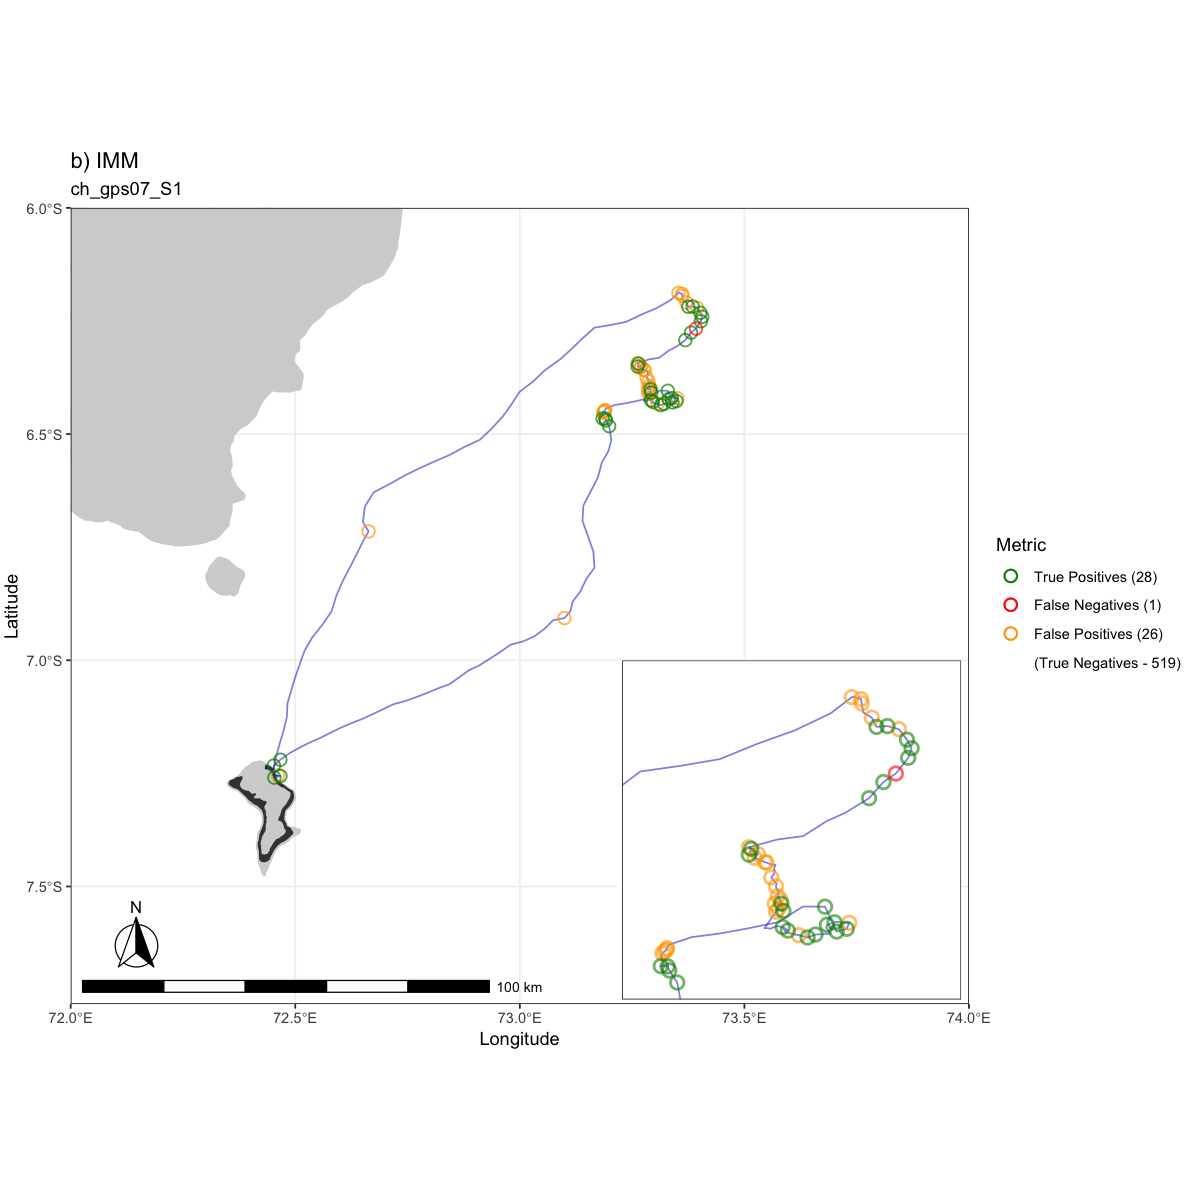

In [825]:
# IMMMM
IMM300 = fread('../Data/Reduced/IMM300_reduced_all_dives.csv', select = c('TagID', 'ix', 'Dive'))

# Load predicitions
dive.preds = fread('../Results_t0.1_NoLUX_RmNA//IMM_300_xval_predictions.csv', stringsAsFactors = FALSE) 

# Join
dives.n.preds = left_join(dive.preds, IMM300, by = c('TagID','ix'))
dives.n.preds = dives.n.preds[order(dives.n.preds$ix),]

# Load GPS data
gps.dta = fread('../Data/BIOT_DGBP/all_gps_data.csv', select = c('ix', 'TagID', 'location-lat', 'location-lon', 'Max_depth_m'))

gimm = plot_CM_track("ch_gps07_S1", 'IMM', gps.dta, dives.n.preds)
gimm

## ACC

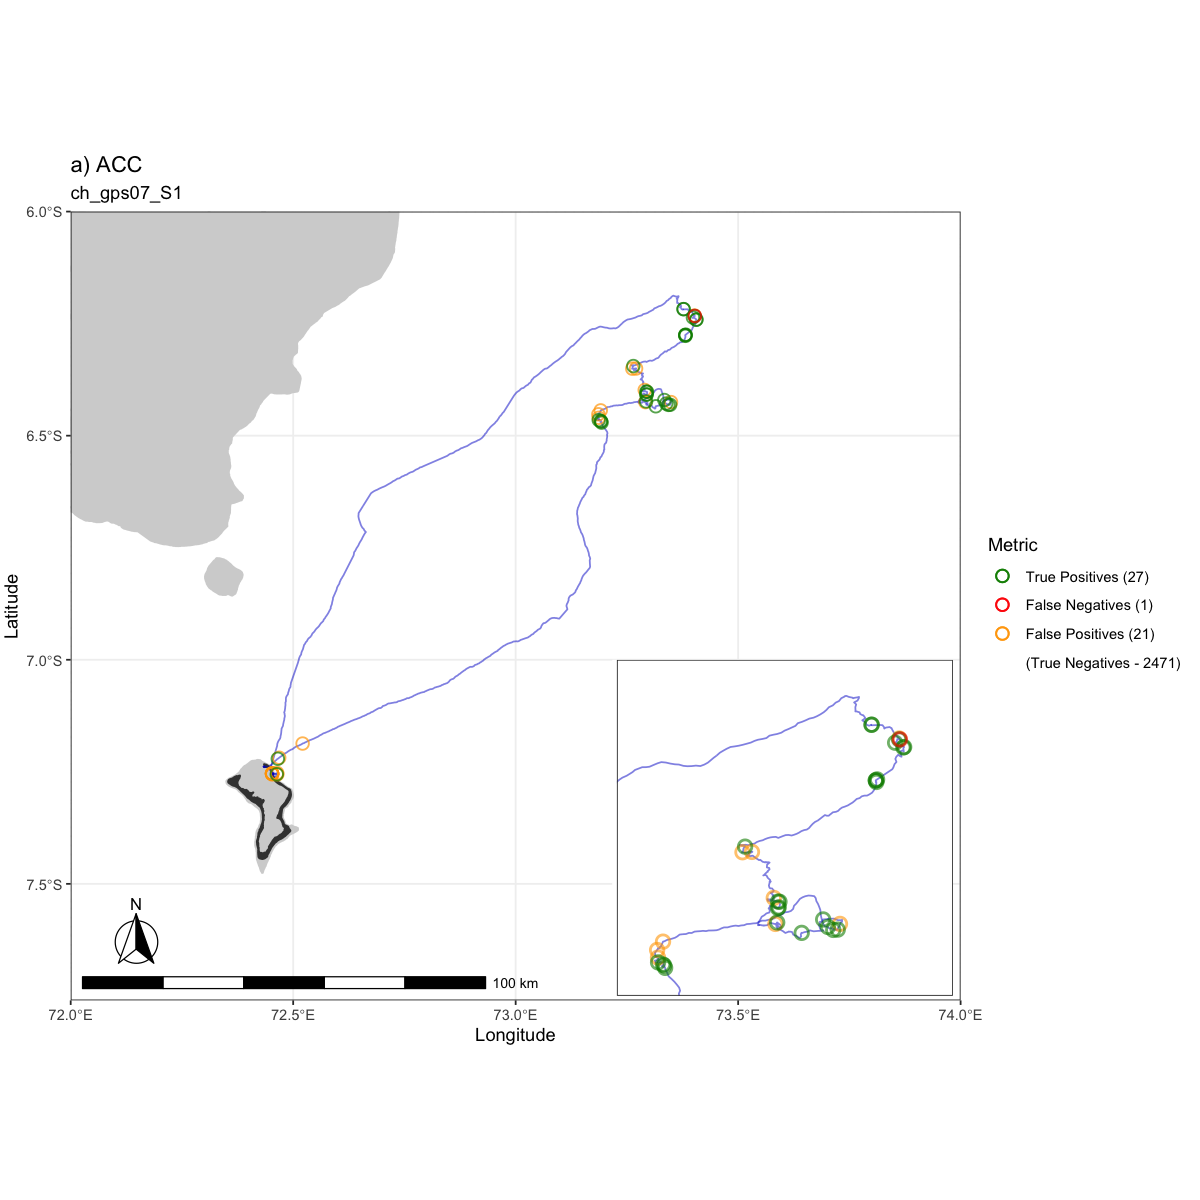

In [819]:
ACC4 = fread('../Data/Reduced/ACC4_reduced_all_dives.csv', select = c('TagID', 'ix', 'Dive'))
ACC4$TagID = str_remove(ACC4$TagID, "_gv[0-9]+_?[0-9]+")

# Load predicitions
dive.preds = fread('../Results_t0.1_NoLUX_RmNA//ACC_4_xval_predictions.csv', stringsAsFactors = FALSE) 
dive.preds$TagID = str_remove(dive.preds$TagID, "_gv[0-9]+_?[0-9]+")

# Join
dives.n.preds = left_join(dive.preds, ACC4, by = c('TagID','ix'))
dives.n.preds = dives.n.preds[order(dives.n.preds$ix),]

# Load GPS data
gps.dta = fread('../Data/BIOT_DGBP/all_gps_data.csv', select = c('ix', 'TagID', 'location-lat', 'location-lon', 'Max_depth_m'))

gacc = plot_CM_track("ch_gps07_S1", 'ACC', gps.dta, dives.n.preds)
gacc

* 1 dive would be caught in ~750 ACC windows. You could take the proportion of dives/non-dive ACC windows in each GPS window (or the *probability* of a dive in each GPS window) 
* The ones bunched up show true diving behaviour. The false positives are much more sporadic, so prioratising these is not a fair metric.
* **Problem:** False positives kind of usless to plot unless evauated on set with ALL negatives as well as psitives. 
    * Perhaps feasible with immersion but ot ACC?
    * Solution for imm: Make predict_dives function work on full rolling window data?

1. Load depth/GPS data
2. Interpolate to 1s res (This not stricly necessary, could do same thing with GPS rows, in whcih case use all_loc_data.csv instead)
2. Extract ix col (as they're now all GPS rows) and from that create ix window vector around each
3. In each GPS window, check proportions of 1-predictions in full data. 
5. Create a Prediction column that queries whether PredDiveProp>0.5, and call that row a predicted dive row if so
4. True dive windows are those where max_depth_m > 0.1
5. Construct confusio